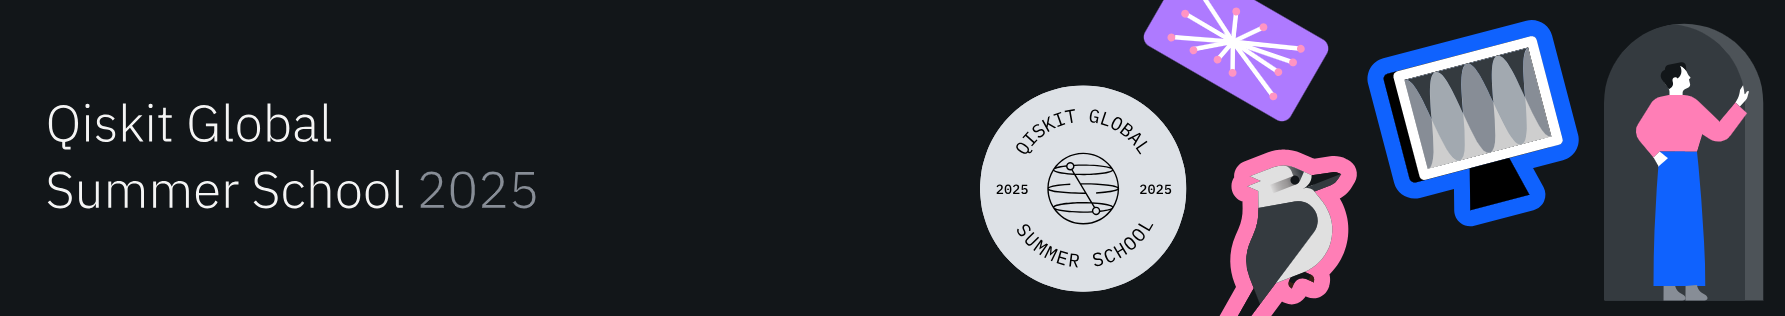



# Lab 3: The Power of 'good sampling' for simulating a chemistry Hamiltonian with SQD

Welcome to the third coding challenge of the Qiskit Global Summer School. In this lab, we explore one of the most promising applications of quantum computing, which is quantum chemistry. We present you with a real-life example of simulating a molecule using a quantum computer based on a workflow that quantum chemists may usually follow. We will explain what each step takes to achieve this and walk you through the entire workflow.

**Recommended study**<br>
Prior to going through this challenge, we recommend that you take a moment and check out the [Variational Algorithm Design](https://quantum.cloud.ibm.com/learning/en/courses/variational-algorithm-design) course and one of our latest courses on IBM Quantum Learning, [Quantum Diagonalization Algorithms](https://quantum.cloud.ibm.com/learning/en/courses/quantum-diagonalization-algorithms/skqd). 


# Table of Contents

* [Part 1: Introduction](#part-1-introduction)
    * 1.1 Objective
    * 1.2 What Are Atoms?
    * 1.3 The Schr√∂dinger Equation
    * 1.4 Basis Set Approximation - Smart Building
    * 1.5 The Hamiltonian
    * [Exercise 1](#exercise1): Measure the size of the $O_2$ Hamiltonian
* [Part 2: Variational Quantum Eigensolver](#part-2-variational-quantum-eigensolver)
    * VQE ‚Äì A Team-Up Between Classical and Quantum Computers
* [Part 3: What is Sample-based Quantum Diagonalization (SQD)?](#part-3-what-is-sample-based-quantum-diagonalization-(SQD)?)
    * SQD Approach: Reconstruct the Hamiltonian with 'good samples'
    * Choosing relevant configurations
    * Dealing with the effects of noise with configuration recovery
* [Part 4: How to simulate a $N_2$ molecule with SQD](#part-4-how-to-simulate-a-$N_2$-molecule-with-SQD)
    * [Exercise 2](#exercise2): Flip a bit by configuration recovery
* [Part 5: Improve the ansatz](#part-5-improve-the-ansatz)
    * [Exercise 3](#exercise3): Change the basis set
    * [Exercise 4](#exercise4): Select the best layout
    * [Exercise 5](#exercise5): Add more interaction to LUCJ ansatz
* [Bonus: Real hardware execution with error mitigation ](Bonus-real-hardware-execution-with-error-mitigation )


## Requirements

Before starting this tutorial, please make sure that you have the following installed:

* Qiskit SDK 2.0 or later with visualization support (`pip install 'qiskit[visualization]'`)
* Qiskit Runtime 0.40 or later (`pip install qiskit-ibm-runtime`)
* Qiskit Addons SQD 0.11.0 or later (`pip install qiskit-addon-sqd`)
* ffsim (`pip install ffsim`)


<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** You need to have the below packages installed in order to run this lab, of which some are not available on Windows. If you are using Windows we recommend you to use [an online lab environment.](https://quantum.cloud.ibm.com/docs/en/guides/online-lab-environments#online-lab-environments)
</div>

In [1]:
# Instala√ß√£o dos pacotes necess√°rios
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"
%pip install qiskit==2.0
%pip install pyscf
%pip install ffsim
%pip install qiskit_addon_sqd
%pip install 'qiskit[visualization]'
%pip install qiskit_ibm_runtime==0.40
%pip install graphviz

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-erkxrrap/qc-grader_afbefadbeb3b434e8e42b407575d7adc
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-erkxrrap/qc-grader_afbefadbeb3b434e8e42b407575d7adc
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit-2.0.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-2.0.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.1
    Uninstalling qiskit-2.1.1:
      Successfully uninstalled qiskit-2.1.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need

In [2]:
import qiskit
import qc_grader
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')

Qiskit version: 2.0.0
Grader version: 0.22.12
Qiskit IBM Runtime: 0.40.0


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.12`. If you see a lower version, you need to reinstall the grader and restart the kernel.
Also make sure you have set up everything according to lab 0 and test it with the cell below.

In [3]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'default-ibm-cloud': {'channel': 'ibm_cloud',
  'url': 'https://cloud.ibm.com',
  'token': 'rqHNn40lAGhFvAvcgbkJ3xO0R37fxY1NmxNcC2lvZbtt',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/9418f3a1469ab60e6a7b8c679c5dcf0b:2842dc64-4cb1-4fff-8b1f-326d1dd2e1ca::',
  'verify': True,
  'private_endpoint': False},
 'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'rqHNn40lAGhFvAvcgbkJ3xO0R37fxY1NmxNcC2lvZbtt',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/9418f3a1469ab60e6a7b8c679c5dcf0b:2842dc64-4cb1-4fff-8b1f-326d1dd2e1ca::',
  'verify': True,
  'private_endpoint': False}}

# Imports

In [4]:
# Import common packages first
import numpy as np
from math import comb
import warnings
import pyscf
import matplotlib.pyplot as plt
import pickle
from functools import partial

# Import qiskit classes
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit_addon_sqd.fermion import SCIResult, diagonalize_fermionic_hamiltonian, solve_sci_batch

# Import qiskit ecosystems
import ffsim
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime import SamplerOptions

# Import grader
from qc_grader.challenges.qgss_2025 import (
    grade_lab3_ex1, 
    grade_lab3_ex2, 
    grade_lab3_ex3,
    grade_lab3_ex4,
    grade_lab3_ex5
)

# 1. Introduction 

## 1.1 Objective

The objective of this Lab is to learn the basics and general workflow of quantum chemistry calculations. You will also learn about a useful hybrid quantum-classical algorithm called Sample-based Quantum Diagonalization (SQD) algorithm. SQD is a classical post-processing technique which acts on samples obtained from a quantum circuit after execution on a QPU. It is useful for finding eigenvalues and eigenvectors of quantum operators, such as the Hamiltonian of a quantum system, and uses quantum and distributed classical computing together. 


## 1.2 What Are Atoms?
Everything around you is made of atoms‚Äîthe tiny building blocks of matter. The word ‚Äúatom‚Äù comes from a Greek word that means ‚Äúcan‚Äôt be split.‚Äù A long time ago, a man named Democritus thought that all things were made of tiny, unbreakable pieces called atoms.

In 1913, Niels Bohr said electrons move in circles (orbits) around the center of the atom, like planets around the sun. 
But in 1926, Erwin Schr√∂dinger said electrons don‚Äôt really move in perfect paths. Instead, they buzz around in "clouds" where they‚Äôre most likely to be found.

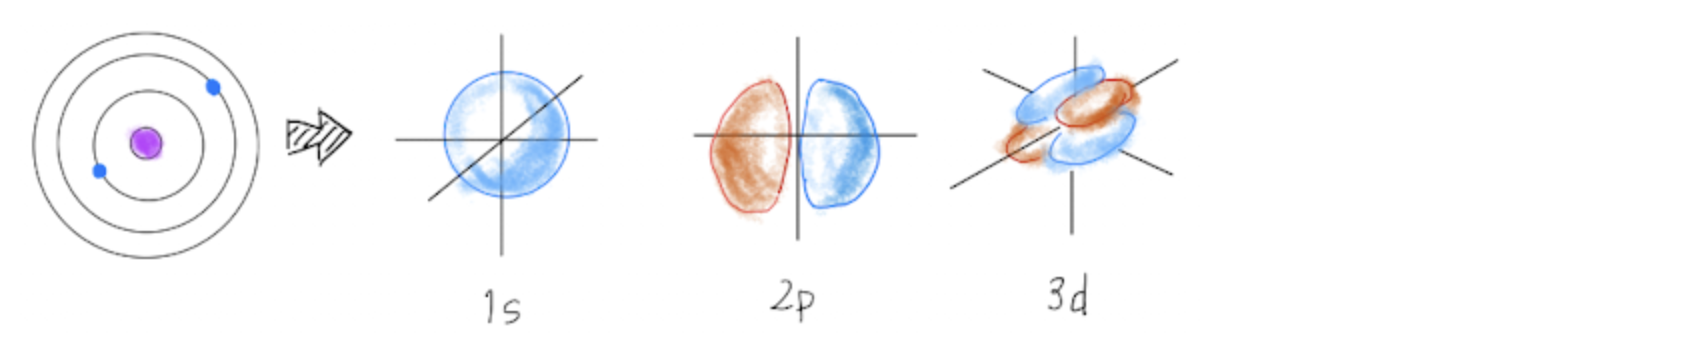

Fig 1. A sketch of Bohr‚Äôs atomic model (left) and Schr√∂dinger‚Äôs atomic model based on quantum mechanical and wave nature of electrons (right).„ÄÄ <br>


These clouds (called orbitals) have different shapes and energy levels. Electrons usually stay in the lowest energy level (the ground state), but they can jump to higher ones if they get energy. When they fall back down, they give off energy.

## 1.3 The Schr√∂dinger Equation

Erwin Schr√∂dinger's contributions to quantum mechanics go beyond introducing a new electronic model; he established the famous Schr√∂dinger equation. The time-independent Schr√∂dinger equation is:
$$
\hat{H}|\psi\rangle = {E}|\psi\rangle
$$

**$\hat{H}$**  : Hamiltonian operator <br>
**$|\psi\rangle$** : Wave function (state of the system) <br>
**${E}$** : Measured energy (eigenvalue) <br>

**The goal of quantum chemistry is to solve the Schr√∂dinger Equation** for the wave function. The wave function that satisfies the Schr√∂dinger Equation can help us find out interesting properties of that quantum system such as energy, momentum, spin, magnetization, and more. 

In quantum chemistry, we are often interested in finding **the ground state energy**. This is because once we know the ground state energy of a molecule, we can learn a lot such as:

- the shape a molecule will most likely take in a stable form. (often called the "equilibrium" state)
- how molecules might change or react during chemical reactions.
- how a drug might stick to a protein in the body seen in Docking simulations.
  
In short, finding the ground state is like finding the starting point for all the interesting things molecules can do.

But for big molecules, **solving the Schr√∂dinger Equation exactly is extremely difficult** because the wave function, which describes the spatial distribution of electrons, is highly complex. So, instead of solving it perfectly, scientists make good guesses or approximations that are close enough.

## 1.4 Basis Set Approximation - Smart Building
One of the key approximations in quantum chemistry is the use  of a **basis set** approach. A basis set is **a collection of mathematical functions used to approximate the orbitals (wavefunctions) of electrons** in atoms and molecules. Since we can't solve the Schr√∂dinger equation exactly for most systems, we use basis sets to make the problem computationally tractable. Instead of working with full, continuous atomic orbitals, we approximate them using a set of predefined mathematical functions‚Äîusually Gaussian-type or Slater-type orbitals.

This method is known as the Linear Combination of Atomic Orbitals (LCAO). The idea is simple: we build molecular orbitals by combining basis functions. It‚Äôs like building a complex shape using a sum of simpler, known shapes.
- A small basis set (fewer functions) gives a rough but fast approximation.
- A larger basis set improves accuracy but requires much more computational power.

<div class="alert alert-block alert-info"> 
<b>Types of Basis Functions</b><br>

- **Slater-type orbitals (STOs)**: These are mathematical functions that look very similar to real atomic orbitals (the shapes electrons naturally form around atoms). They describe how electron density drops off with distance from the nucleus.
- **Gaussian-type orbitals (GTOs)**: Easier to work with computationally, even though they don't resemble orbitals as closely. Often used in practice.</div>


The Slater-type orbital (STO) can be approximated by a combination of Gaussian-type orbitals (GTOs). In other words, we combine multiple Gaussians with different widths to mimic the shape of an STO. This combination is called a **contracted Gaussian function**. This idea is the basis for different kinds of basis sets, like minimal (simple) and split-valence (more accurate) sets.

- **Minimal Basis Set**:
A basis set that uses just one function per orbital (e.g., one function for $1s$, one for $2s$, etc.).
In STO-3G, for example, each STO is approximated using 3 Gaussians.
- **Split-Valence Basis Set**:
These are more flexible and provide more accurate representations than minimal basis sets.
They split the valence orbitals (the outermost orbital that contain electrons involved in bonding with other atoms) into two or more parts, each approximated with different combinations of Gaussians (like 6-31G).
This allows for better accuracy in chemical bonding and reactions.

### Common Basis Sets

|   Basis	Set    | Description	| Example Use | Computational Cost |
| ----------------- | ----------- | ----------- | ----------- |
| **STO-3G**	| Uses 3 Gaussians (the "3G") to mimic 1 STO. (aka 'Minimal basis')| Fast, rough estimate for small molecules| Low |
| **6-31G**	  | Uses 6 Gaussians to mimic 1 STO (the "6") for each core orbital. For each valence  (outer) orbital, a contracted function made of 3 Gaussians (the "3") and a single uncontracted Gaussian (the "1") are used.	| Good balance between speed and accuracy| Medium |
| **cc-pVDZ**	| Designed to improve electron correlation calculations. Adds polarization functions. Uses 2 basis functions for each valence orbitals instead of 1.	| More accurate than STO-3G and 6-31G when simulating systems that have stronger correlations, but more computationally expensive.| High |

> NOTE: The computational cost referred to in the table above is the classical cost of computing the molecular integrals. The more functions in your basis set, the more accurate your results‚Äîbut computations take longer.

To summarize, instead of solving the full Schr√∂dinger equation exactly (which is almost always impossible for molecules), we build a flexible, approximate wave function using known functions‚Äîand then tune it to minimize the system‚Äôs energy.

## 1.5 The Hamiltonian

At the heart of the Schr√∂dinger equation, and to that extent in every quantum chemistry problem, there is a **Hamiltonian**. It‚Äôs a central object in both classical mechanics and quantum mechanics, and is essentially a function that represents the total energy (kinetic + potential) of a physical system.  

In quantum mechanics, the Hamiltonian $\hat{H}$ becomes an operator acting on the wave function $|\psi\rangle$. In a chosen basis, these wave functions $|\psi\rangle$ can be described as vectors and Hamiltonians in matrix form. 

In most quantum chemistry problems, the first and most important goal was to calculate its ground state energy. This calculation can be done by diagonalizing a Hamiltonian (matrix) and computing its eigenvalues and eigenvectors.

The size or dimensions of a molecular Hamiltonian can be determined by finding the number of combinations the electrons can occupy the spatial orbitals. This is essentially a combination problem that can quickly grow exponential in size making the diagonalization uncontractable for most interesting molecules. 

### Example: Calculate the size of the $N_2$ Hamiltonian
We would like you to get a sense of how large a Hamiltonian matrix $H$ can grow, even for a relatively small molecule like nitrogen ($N_2$), depending on how accurately you want to simulate it. In the following example, we chose the number of spatial orbitals, spin orbitals, and electrons of $N_2$ to use in our calculations. 

Using the number of spatial orbitals and electrons in the table below, let's compute the number of ways the electrons can occupy the spatial orbitals (spin configurations), which indicates the size of the $N_2$ molecule Hamiltonian.


|   |    STO-3G  |  6-31G  | cc-pVDZ  |  
|:-------|:------:|:-------:|:-------:|
|Spatial orbitals | (10) **8**| (18) **16** | (28) **26** |
|Spin orbitals | (20) **16**| (36) **32**| (56) **52** |
| Œ±-spin electrons  | (7) **5**| (7) **5**| (7) **5** |
| Œ≤-spin electrons  | (7) **5**| (7) **5**| (7) **5** |


<p style="text-align:center;">Table 1: Number of orbitals and electrons in specified basis sets for $N_2$</p>

- (#) : number of orbitals and electrons we specifically chose for the purpose of this example.
- **#** : number of orbitals or electrons when freezing the core orbital (*1s*) and reducing the number of electrons and spatial orbitals each by 2.

<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** In this example we treat the $1s$ (core) orbital as chemically inactive. This means we can freeze the core orbital and save 2 electrons and 2 spatial orbitals (i.e. 4 spin orbitals -> 4 qubits). This is another useful approximation technique you will frequently see in actual chemistry simulations. Applying this technique, please make sure to use the numbers in **bold** for calculating for all possible electron configurations for the $N_2$ Hamiltonian.
</div>

As you can tell, solving for all possible spin configurations is essentially a combination problem. Let's take a look at the math to calculate how many ways the **$\alpha$-spin (spin-up)** electrons and **$\beta$-spin (spin-down)** electrons can each occupy given spatial orbitals. For the total spin configurations we simply need to multiply them together. 

<p style="text-align:center;">Total electron configurations = (total Œ±-spin configurations) √ó (total Œ≤-spin configurations)</p>

$$ \Large{n}\Large{C}n_Œ± \times n\Large{C}n_Œ≤ = \Large\frac{n!}{n_Œ±!(n-n_Œ±)!} \times \Large\frac{n!}{n_Œ≤!(n-n_Œ≤)!}  $$

Where
**$n$**: number of spatial orbitals,
**$n_Œ±$**: number of Œ±-spins,
**$n_Œ≤$**: number of Œ≤-spins

Now that we know how to obtain the total spin configurations, let's calculate this in each basis set and plot the results to see how the size of the Hamiltonian grows with more accuracy.

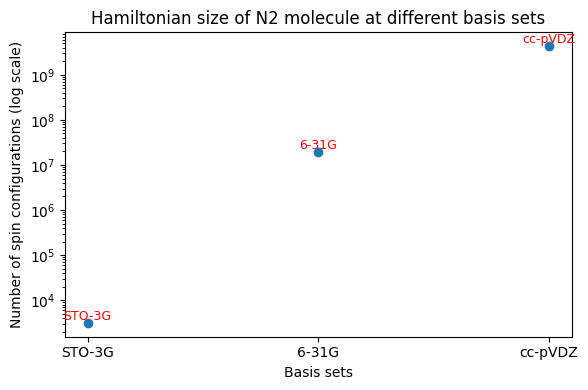

In [5]:
# Number of possible spin configurations
# Example: N2 molecule in STO-3G, 6-31G, and cc-pVDZ basis sets
# 14 electrons, 20 spin orbitals (from 10 spatial orbitals √ó 2)

# Calculate total electron configurations for each basis set
y1 = comb(8, 5) * comb(8, 5)       # STO-3G
y2 = comb(16, 5) * comb(16, 5)     # 6-31G
y3 = comb(26, 5) * comb(26, 5)     # cc-pVDZ

# Data
y = [y1, y2, y3]
x = list(range(len(y)))
labels = ['STO-3G', '6-31G', 'cc-pVDZ']

# Plot with logarithmic y-scale
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o')

plt.yscale('log')
plt.xticks(x, labels)
plt.xlabel('Basis sets')
plt.ylabel('Number of spin configurations (log scale)')
plt.title('Hamiltonian size of N2 molecule at different basis sets')

# Add labels above points
for i in range(len(x)):
    plt.text(x[i], y[i], f'{labels[i]}', fontsize=9, ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()

Note that the Y-axis above is in logarithmic scale. You can see how the number of spin configurations grows exponentially with a basis set choice of better approximation.

## Exercise 1: Measure the size of the $O_2$ Hamiltonian

Now let's calculate the size of oxygen $O_2$ in the `6-31G` basis. Oxygen has the same number of orbitals as $N_2$ but has 2 additional **$\alpha$-spin (spin-up)** electrons. The numbers you need to use in this exercise are provided in the table below. 

<a id="exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 1: Measure the size of the $O_2$ Hamiltonian</b> 

Using the number of spatial orbitals and electrons in the table below, compute the total number of electron spin configurations for the oxygen $O_2$ molecule in the `6-31G` basis. **You may write your own code or calculate by hand to get the answer.**


|   |    STO-3G  |  6-31G  | cc-pVDZ  |  
|:-------|:------:|:-------:|:-------:|
|Spatial orbitals | (10) **8**| (18) **16** | (28) **26** |
|Spin orbitals | (20) **16**| (36) **32**| (56) **52** |
| Œ±-spin electrons  | (9) **7**| (9) **7**| (9) **7** |
| Œ≤-spin electrons  | (7) **5**| (7) **5**| () **5** |


<p style="text-align:center;">Table 1: Number of orbitals and electrons in specified basis sets for $O_2$</p>

- (#) : number of orbitals or electrons based on actual atomic structure in the specified basis set.
- **#** : number of orbitals or electrons when freezing the core orbital (*1s*) and reducing the number of electrons and spatial orbitals each by 2.
</div>


<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** As we already saw in the previous example, we will treat the $1s$ (core) orbital as chemically inactive in this exercise. This means we can freeze the core orbital and save 2 electrons and 2 spatial orbitals (i.e. 4 spin orbitals -> 4 qubits). This is another useful approximation technique you will frequently see in actual chemistry simulations. Applying this technique, please make sure to use the numbers in **bold** for calculating for all possible electron configurations for the $O_2$ Hamiltonian.
</div>

In [6]:
# ---- TODO : Task 1 ---
# Exercise 1: Calculate the total number of spin configurations for O2

import math

# O2 molecule data from the table
# Using the values in bold (frozen core approximation applied)
num_alpha_electrons = 6  # 8 - 2 (frozen core)
num_beta_electrons = 6   # 8 - 2 (frozen core)
num_orbitals = 14        # 16 - 2 (frozen core)

# Calculate number of ways to choose alpha electrons among orbitals
alpha_configs = math.comb(num_orbitals, num_alpha_electrons)

# Calculate number of ways to choose beta electrons among orbitals
beta_configs = math.comb(num_orbitals, num_beta_electrons)

# Total configurations = alpha_configs * beta_configs
total_config = alpha_configs * beta_configs

print(f"Number of alpha electrons: {num_alpha_electrons}")
print(f"Number of beta electrons: {num_beta_electrons}")
print(f"Number of orbitals: {num_orbitals}")
print(f"Alpha configurations: C({num_orbitals}, {num_alpha_electrons}) = {alpha_configs}")
print(f"Beta configurations: C({num_orbitals}, {num_beta_electrons}) = {beta_configs}")
print(f"Total configurations: {alpha_configs} √ó {beta_configs} = {total_config}")
# --- End of TODO ---

Number of alpha electrons: 6
Number of beta electrons: 6
Number of orbitals: 14
Alpha configurations: C(14, 6) = 3003
Beta configurations: C(14, 6) = 3003
Total configurations: 3003 √ó 3003 = 9018009


In [7]:
# total_config =  #provide your answer here if calculated by hand. Then uncomment this section before you submit your answer.
total_config =  49969920

In [8]:
# Submit your answer using following code

grade_lab3_ex1(total_config) # Expected result type: integer

Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.


After submitting your answer calculated in the 6-31G basis, try calculating the same in other basis sets (e.g. STO-3G, and cc-pVDZ) for comparison. Feel free to plot your results to see how the size grows.

## Solution to Exercise 1: Measure the size of the O‚ÇÇ Hamiltonian

We calculate the total number of spin configurations for O‚ÇÇ in the 6-31G basis, using the bold numbers from the table (core frozen). The result shows how quickly the problem grows with the number of orbitals and electrons.
from math import comb

# O2 in 6-31G basis (core frozen)
alpha_config = comb(16, 7)  # Œ±-spin
data_config = comb(16, 5)   # Œ≤-spin
total_config = alpha_config * data_config

print(f"Total physical configurations for O2 in the given basis : {total_config:,}")
# Expected result: 49,969,920

# 2. Variational Quantum Eigensolver

## Solution to Exercise 2: Configuration Recovery

We correct a bitstring so that the number of electrons is correct, flipping the bit with the highest occupancy weight. The method uses the weight function described in the statement.
n = [0.007, 0.029, 0.029, 0.995, 0.976, 0.976, 0.993, 0.997,
     0.007, 0.029, 0.029, 0.995, 0.976, 0.976, 0.993, 0.997]
x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]

# Calculate the index of the bit to be flipped
y = [abs(x[i] - n[i]) for i in range(len(x))]
h = 10 / 16  # filling factor
delta = 0.01
w = [delta * (y[i] / h) if y[i] <= h else delta + (1 - delta) * ((y[i] - h) / (1 - h)) for i in range(len(y))]
max_idx = w.index(max(w))

corrected_x = x.copy()
corrected_x[max_idx] = 1 if x[max_idx] == 0 else 0

print("Corrected bitstring:", corrected_x)

So far, we've learned about the Schr√∂dinger Equation, basis sets, and how the Hamiltonian of a physical system can grow exponentially in size depending on how accurately you want to simulate your system. Now let's talk about algorithms. 

One of the well-known algorithms among computational chemists who work with near-term quantum computers is perhaps the **Variational Quantum Eigensolver (VQE)**.

The Variational Quantum Eigensolver (VQE) is a hybrid quantum-classical algorithm used to optimize a cost function Hamiltonian based on the variational principle. Although this lab's main focus is on learning about a different kind of hybrid quantum-classical algorithm called Sample-based Quantum Diagonalization (SQD), it would be useful to briefly review the components of VQE as they form some of the important building blocks for SQD as well.

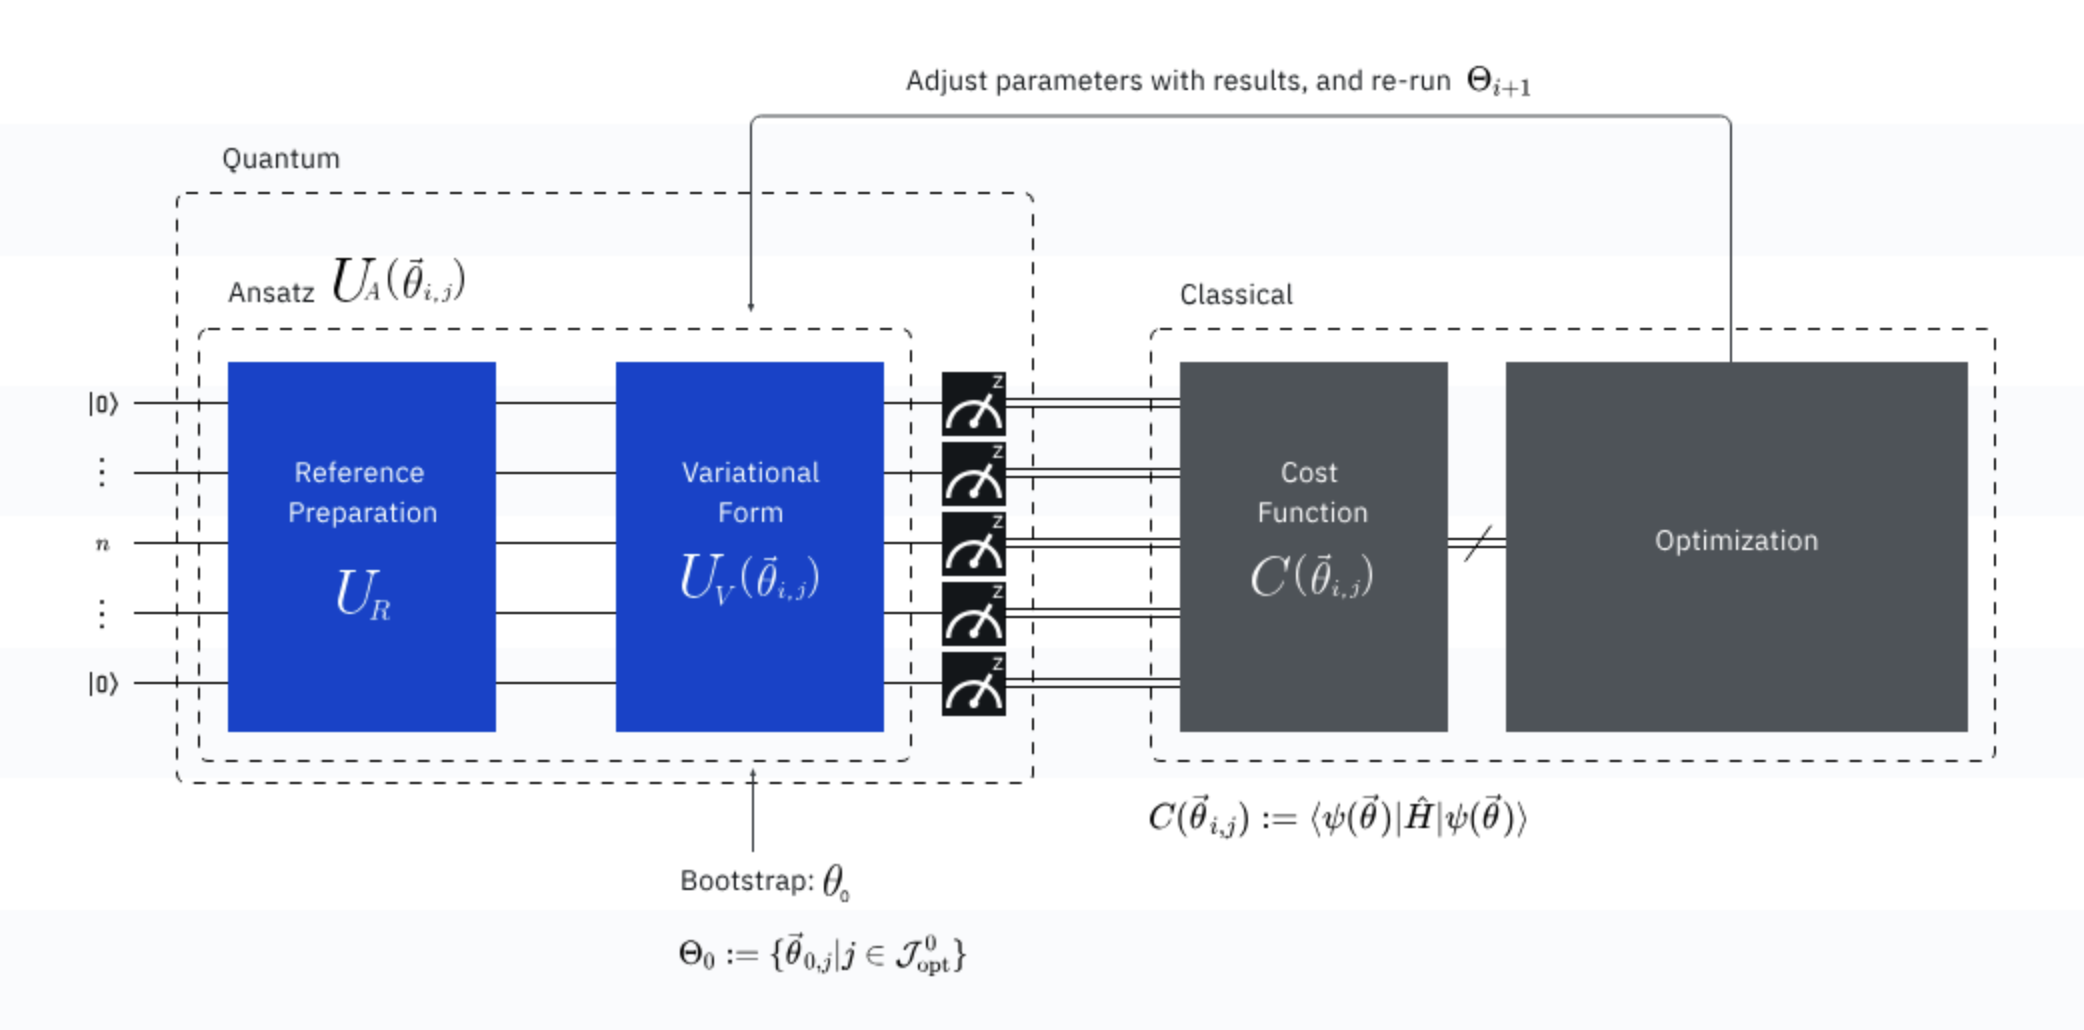

Fig 2. A diagram that shows the computational workflow of VQE

Summary of Computational Steps in VQE:

1. Prepare the quantum state $|\psi(ùúÉ)\rangle$(Quantum).
2. Measure expectation values $\langle\psi(ùúÉ)|\hat{H}|\psi(ùúÉ)\rangle$(Quantum). 
3. Compute the cost function $ùê∏(ùúÉ)$(Classical).
4. Adjust the parameter $ùúÉ$ using classical optimization (Classical).
5. Repeat the steps until cost function $ùê∏(ùúÉ)$ converges.

As you can tell from the above, the computational steps for executing VQE is an 'iterative' process - you need to repeat these steps many, many, times. This is a computationally costly procedure and becomes a limitation for an algorithm like VQE to scale and work with larger molecules. 

# 3. What is Sample-based Quantum Diagonalization (SQD)?

While VQE has been widely explored since its original proposal in 2014, it has certain limitations. As the Hamiltonian grows larger, obtaining the expectation value through the variational method becomes increasingly resource-intensive, and the algorithm does not scale well for larger molecules. This challenge motivates the study and implementation of Sample-based Quantum Diagonalization (SQD).

SQD was inspired by a hybrid quantum-classical method called quantum-selected configuration interaction (QSCI) introduced and published in [this paper](https://arxiv.org/abs/2302.11320). Similar to QSCI, SQD is also a hybrid quantum-classical algorithm in which a quantum computer is used to generate electronic configurations by sampling them from a quantum circuit, and then those configurations are used to form a subspace in which to project and diagonalize the electronic Hamiltonian.

This subspace will have dimensions that are smaller than the original Hamiltonian making it much easier to classically diagonalize.

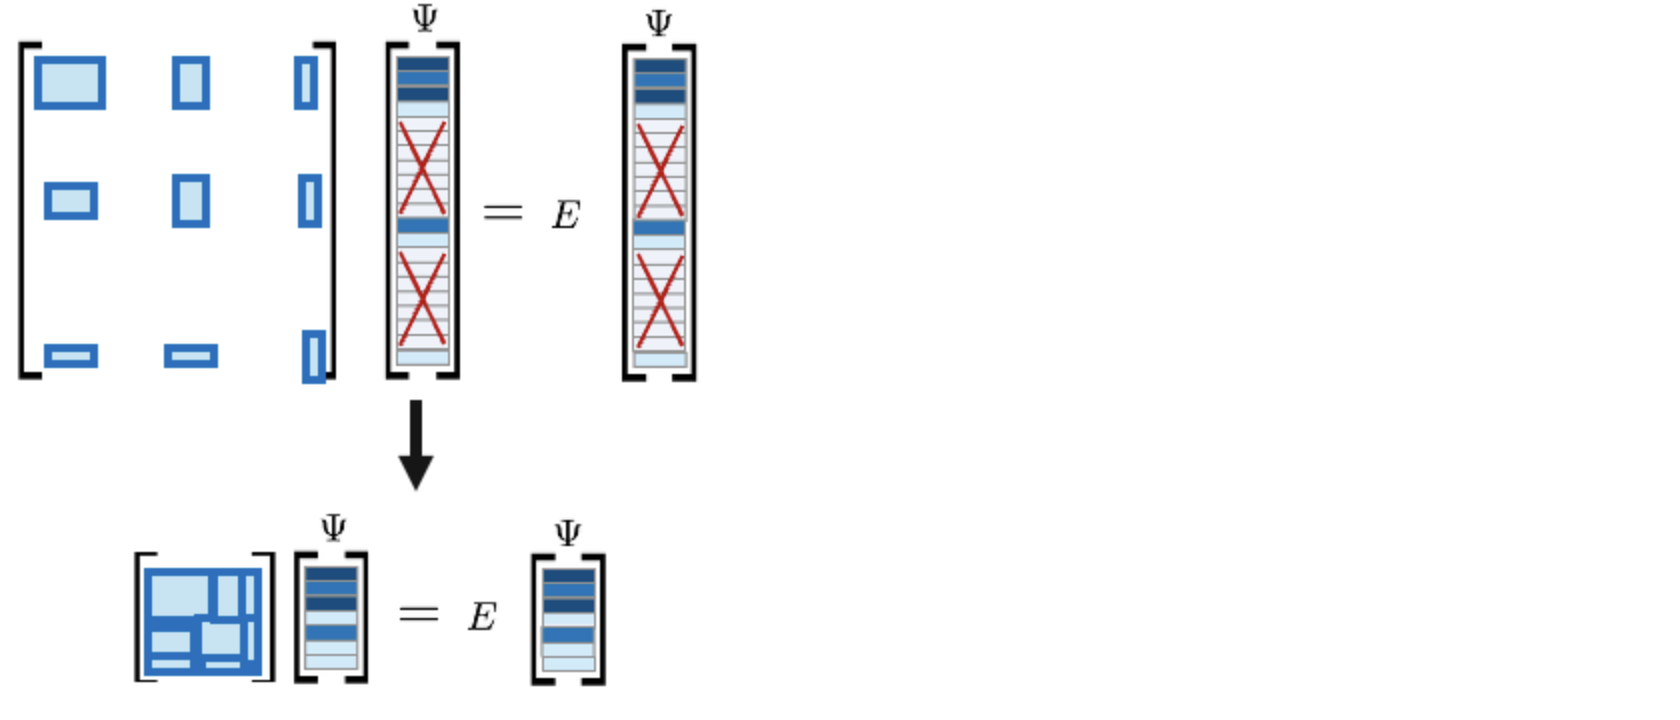

Fig 3. An illustration of the original Hamiltonian shown as an exponentially large matrix in the Hilbert space of N qubits then reduced to a smaller size after configuration recovery and subsampling.


Let's say we have three atomic orbitals 1s, 2p, 3d, and two electrons that can occupy these orbitals that are ranked from low to high energy. Low energy configurations mean most electrons occupy the lower orbitals while high energy configurations will have electrons in the higher orbitals. 
One of the important assumptions of the SQD algorithm is that high-energy configurations will have little contributions to the ground state. This allows us to remove these less relevant configurations so we can focus on a subspace of relevant configurations only - in our case configurations that show occupancies of electrons in the lower orbitals. 

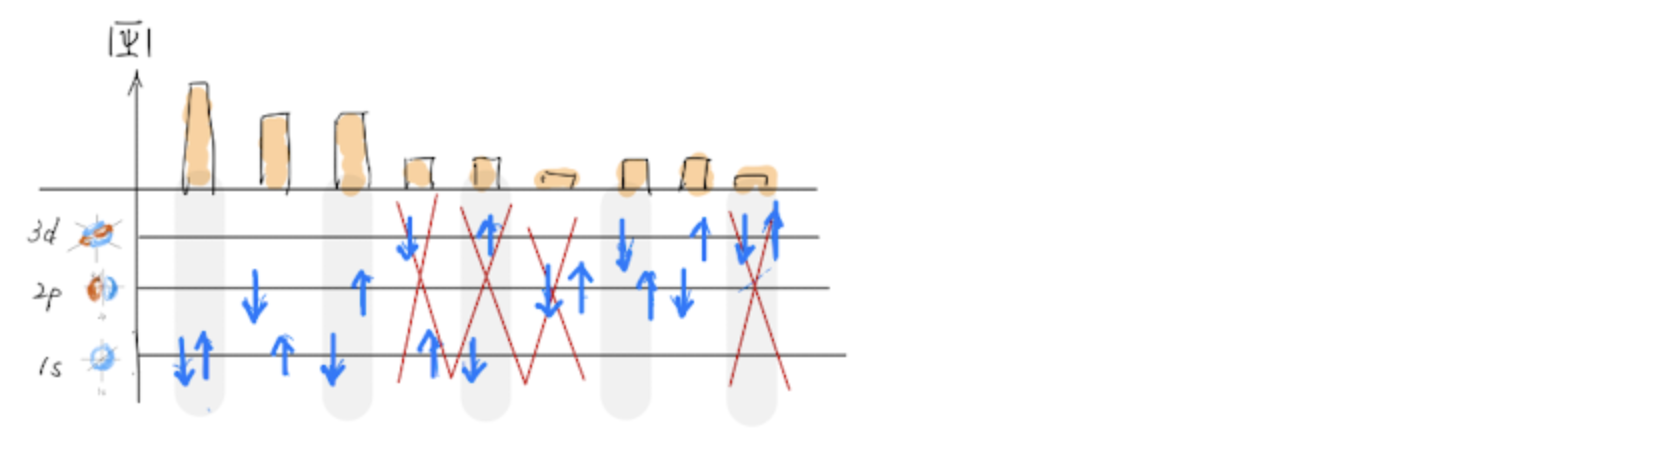

Fig 4. Removing electron configurations that are not relevant to the ground state allows us to reduce the size of the matrix (Hamiltonian)


This reconstruction of Hamiltonian to a smaller size significantly reduces the time to arrive at the solution. 

## Choosing relevant configurations

For identifying the relevant electron configuration, we use a quantum circuit (ansatz) denoted by $|\psi\rangle$ in this illustration, which upon measurement in the computational basis will give us a probability distribution over the Hilbert space to sample necessary bitstrings from. 

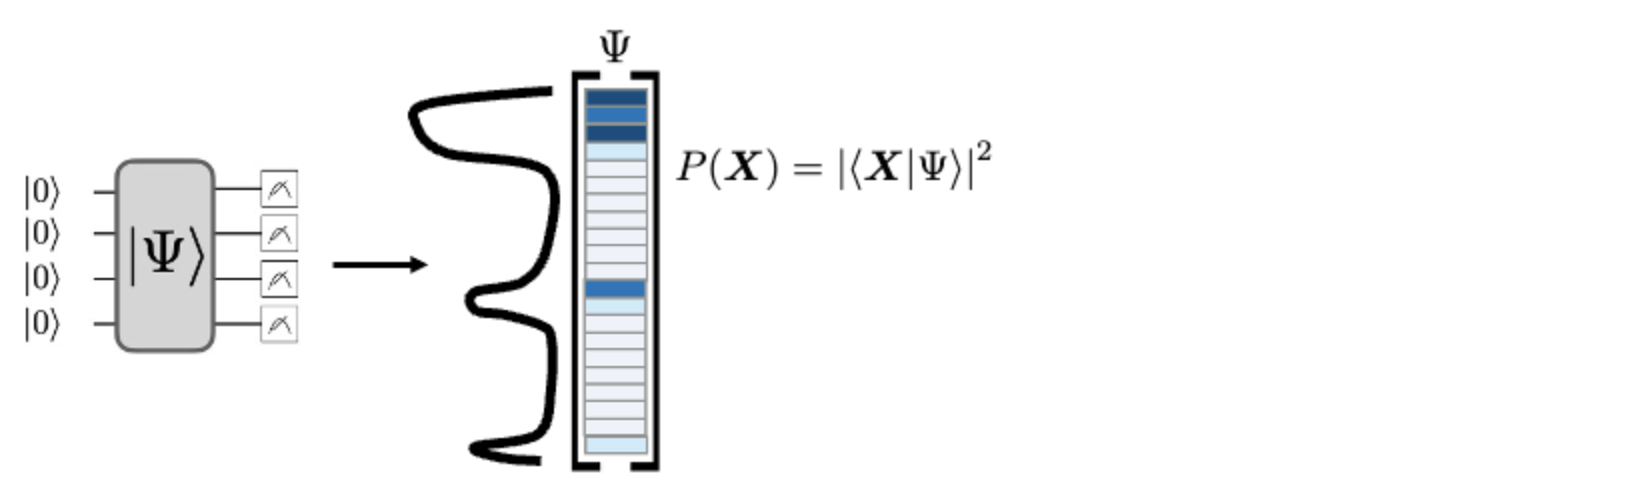

Fig 5. A quantum 'ansatz' circuit will produce the bitstrings we sample from

## Dealing with the effects of noise with configuration recovery

Before we subsample from the pool of bitstrings generated by the quantum circuit, we need to deal with 'noisy quantum samples' that may affect the accuracy of our energy calculations. This is where configuration recovery comes into play.  Let's say we have a bitstring that is missing one electron from its configuration. This is easy to identify as the hamming weight is wrong. We can also exploit the expectation of occupancies in the different orbitals (given by 'n' in the illustration below) to determine which bit to flip to correct the bitstrings.

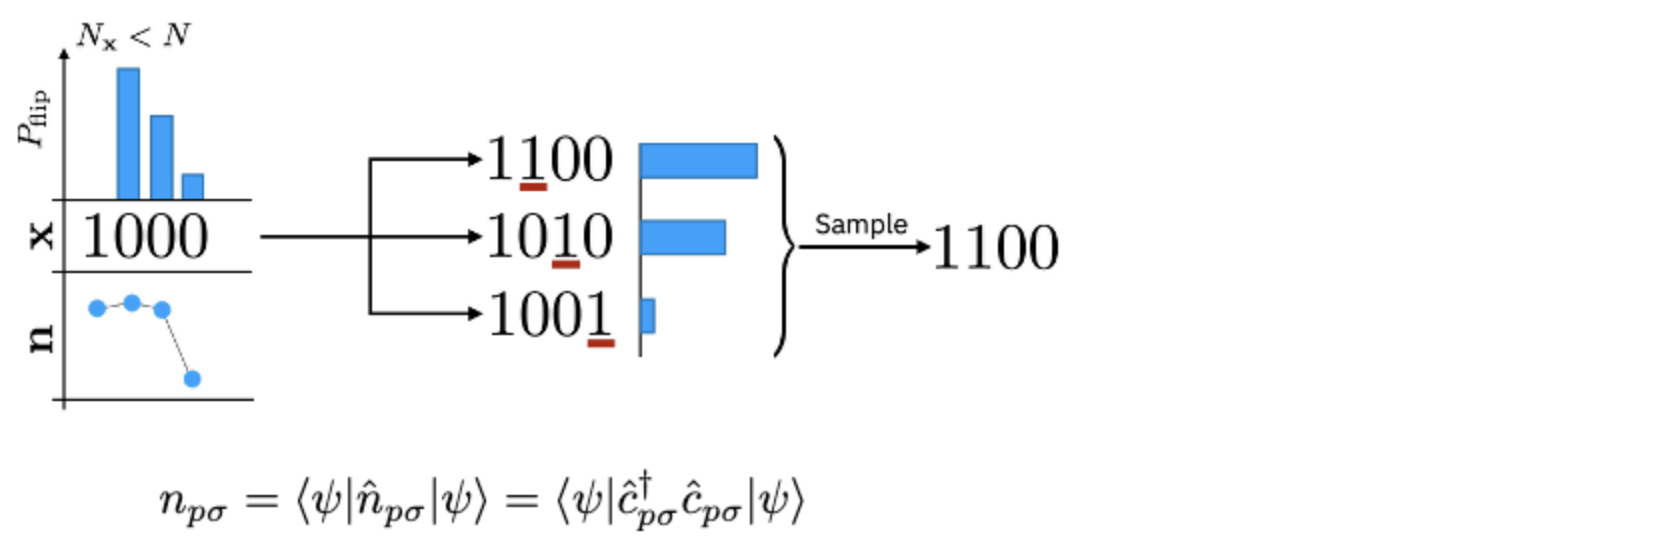

Fig 6. By looking at the electron numbers and occupancy expectation, we can determine which bit to flip

Having reconstructed your Hamiltonian with good samples, you now have a reduced size matrix to diagonalize. Upon diagonalizing the Hamiltonian in the subspace, what the diagonalization subroutine does is assign a non-zero wavefunction amplitude to the computational basis states that contribute to the ground state of the problem. The same routine will assign a zero weight to those bit strings that do not represent the ground state. From the results of all batches, the SQD algorithm obtains the orbital occupancy by electrons and lowest energy estimation and updates the data for the next configuration recovery loop.

# 4. How to simulate an $N_2$ molecule with SQD

In this section, we will demonstrate how to post-process noisy quantum samples to find an approximation to the ground state of a chemistry Hamiltonian: the $N_2$ molecule at equilibrium in the 6-31G basis set. We will follow a SQD approach to process samples taken from a 36-qubit quantum circuit ansatz (in this case, an LUCJ circuit). In order to account for the effect of quantum noise, the configuration recovery technique is used.

## Molecular Hamiltonian

The properties of molecules are largely determined by the structure of the electrons within them. As fermionic particles, electrons can be described using a mathematical formalism called second quantization. The idea is that there are a number of *orbitals*, each of which can be either empty or occupied by a fermion. A system of $N$ orbitals is described by a set of fermionic annihilation operators $\{\hat{a}_p\}_{p=1}^N$ that satisfy the fermionic anticommutation relations,

$$
\begin{align*}
\hat{a}_p \hat{a}_q + \hat{a}_q \hat{a}_p &= 0, \\
\hat{a}_p \hat{a}_q^\dagger + \hat{a}_q^\dagger \hat{a}_p &= \delta_{pq}.
\end{align*}
$$

The adjoint $\hat{a}_p^\dagger$ is called a creation operator.

So far, our exposition has not accounted for spin, which is a fundamental property of fermions. When accounting for spin, the orbitals come in pairs called *spatial orbitals*. Each spatial orbital is composed of two *spin orbitals*, one that is labeled "spin-$\alpha$" and one that is labeled "spin-$\beta$". We then write $\hat{a}_{p\sigma}$ for the annihilation operator associated with the spin-orbital with spin $\sigma$ ($\sigma \in \{\alpha, \beta\}$) in spatial orbital $p$. If we take $N$ to be the number of spatial orbitals, then there are a total of $2N$ spin-orbitals. The Hilbert space of this system is spanned by $2^{2N}$ orthonormal basis vectors labeled with two-part bitstrings $\lvert z \rangle = \lvert z_\beta z_\alpha \rangle = \lvert z_{\beta, N} \cdots z_{\beta, 1} z_{\alpha, N} \cdots z_{\alpha, 1} \rangle$.

The Hamiltonian of a molecular system can be written as

$$
\hat{H} = \sum_{ \substack{pr\\\sigma} } h_{pr} \, \hat{a}^\dagger_{p\sigma} \hat{a}_{r\sigma}
+ \frac12
\sum_{ \substack{prqs\\\sigma\tau} }
h_{prqs} \, 
\hat{a}^\dagger_{p\sigma}
\hat{a}^\dagger_{q\tau}
\hat{a}_{s\tau}
\hat{a}_{r\sigma},
$$

where the $h_{pr}$ and $h_{prqs}$ are complex numbers called molecular integrals that can be calculated from the specification of the molecule using a computer program. In this tutorial, we compute the integrals using the [PySCF](https://pyscf.org/) software package.

For details about how the molecular Hamiltonian is derived, consult a textbook on quantum chemistry (for example, *Modern Quantum Chemistry* by Szabo and Ostlund). 

## Local unitary cluster Jastrow (LUCJ) ansatz

SQD requires a quantum circuit ansatz to draw samples from. In this lab, we'll use the [local unitary cluster Jastrow (LUCJ)](https://pubs.rsc.org/en/content/articlelanding/2023/sc/d3sc02516k) ansatz [1] due to its combination of physical motivation and hardware-friendliness.

The LUCJ ansatz is a specialized form of the general unitary cluster Jastrow (UCJ) ansatz, which has the form

$$
  \lvert \Psi \rangle = \prod_{\mu=1}^L e^{\hat{K}_\mu} e^{i \hat{J}_\mu} e^{-\hat{K}_\mu} | \Phi_0 \rangle
$$

where $\lvert \Phi_0 \rangle$ is a reference state, often taken to be the Hartree-Fock state, and the $\hat{K}_\mu$ and $\hat{J}_\mu$ have the form

$$
\hat{K}_\mu = \sum_{pq, \sigma} K_{pq}^\mu \, \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{q \sigma}
\;,\;
\hat{J}_\mu = \sum_{pq, \sigma\tau} J_{pq,\sigma\tau}^\mu \, \hat{n}_{p \sigma} \hat{n}_{q \tau}
\;,
$$

where we have defined the number operator

$$
\hat{n}_{p \sigma} = \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{p \sigma}.
$$

The operator $e^{\hat{K}_\mu}$ is an orbital rotation, which can be implemented using known algorithms in linear depth and using linear connectivity.
Implementing the $e^{i \mathcal{J}_k}$ term of the UCJ ansatz requires either all-to-all connectivity or the use of a fermionic swap network, making it challenging for noisy pre-fault-tolerant quantum processors that have limited connectivity. The idea of the *local* UCJ ansatz is to impose sparsity constraints on the
$\mathbf{J}^{\alpha\alpha}$ and $\mathbf{J}^{\alpha\beta} $
matrices which allow them to be implemented in constant depth on qubit topologies with limited connectivity. (Here, $\mathbf{J}^{\alpha\alpha}= J_{p q,\alpha\alpha}^1$ and $\mathbf{J}^{\alpha\beta}= J_{p q,\alpha\beta}^1$.)

The IBM hardware has a heavy-hex lattice qubit topology, in which case we can adopt a "zigzag" pattern, depicted below. In this pattern, orbitals with the same spin are mapped to qubits with a line topology (red and blue circles), and a connection between orbitals of different spin is present at every 4th spatial orbital, with the connection being facilitated by an ancillary qubit (purple circles). In this case, the index constraints are

$$
\begin{align*}
\mathbf{J}^{\alpha\alpha} &: \{(p, p+1) \; , \; p = 0, \ldots, N-2\} \\
\mathbf{J}^{\alpha\beta} &: \{(p, p) \;, \; p = 0, 4, 8, \ldots,\; p \leq N-1\}
\end{align*}
$$




Fig 7. IBM's quantum hardware with a heavy-hex lattice qubit topology

## Sample-based Quantum Diagonalization (SQD)

The self-consistent configuration recovery procedure is designed to extract as much signal as possible from noisy quantum samples. The procedure is run in a loop, and each iteration has the following steps:

1. **Recover the configuration**: For each bitstring that violates the specified symmetries, flip its bits with a probabilistic procedure designed to bring the bitstring closer to the current estimate of the average orbital occupancies, to obtain a new bitstring.
2. **Subsample**: Collect all of the old and new bitstrings that satisfy the symmetries, and subsample subsets of a fixed size, chosen in advance.
3. **Diagonalize in subspace**: For each subset of bitstrings, project the Hamiltonian into the subspace spanned by the corresponding basis vectors and compute a ground state estimate of the projected Hamiltonian on a classical computer.
4. **Find the lowest energy**: Update the estimate of the average orbital occupancies with the ground state estimate with the lowest energy.

The SQD workflow is depicted in the following diagram:


Fig 8. A diagram showing the SQD workflow

SQD is known to work well when the target eigenstate is sparse: the wave function is supported in a set of basis states $\mathcal{S} = \{|x\rangle \}$ whose size does not increase exponentially with the size of the problem.

### Configuration recovery loop 1: Recover the configuration

The first step in the configuration recovery loop is to recover the configuration. In other words, error mitigation is performed in this part.

If you run the quantum circuit that is the LUCJ ansatz built above on a quantum computer, you will get a bitstring and its count number as shown in the figure on the lower left. Because current noisy quantum computers give the result with the errors. Since the particle number of "spin-$\alpha$" and "spin-$\beta$" of the molecule in problem is fixed, we will correct the error by flipping a part of the resulting bitstring so that the particle number is stored correctly.

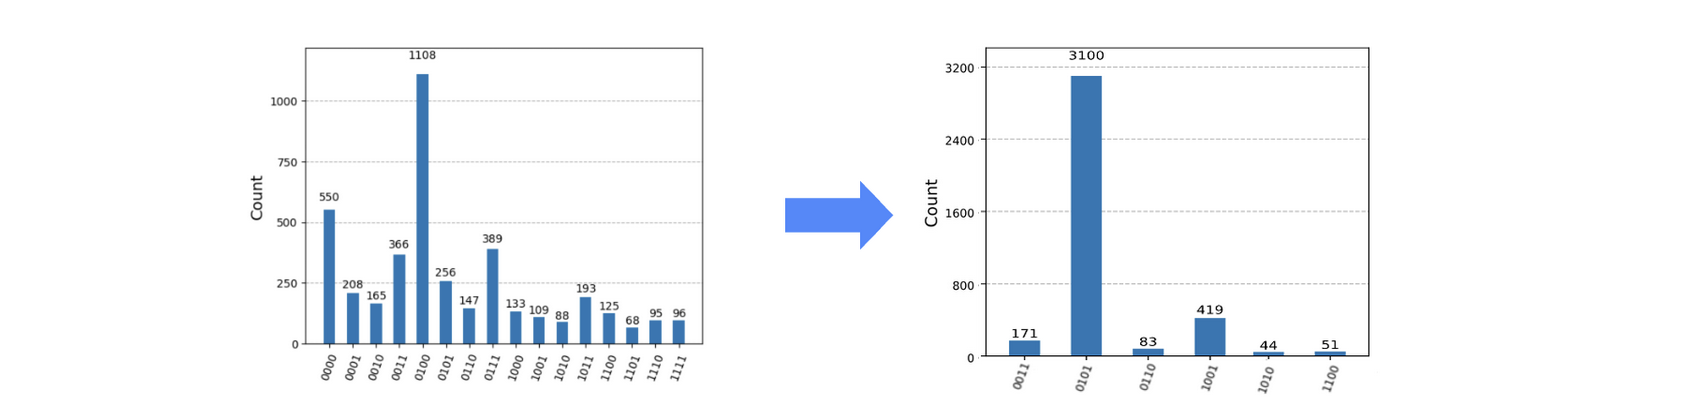

Fig 9. Bitstrings that are initially produced by the LUCJ ansatz circuit (left) and the corrected bitstrings (right)

For example, let's think about a problem that considers up to four spin orbitals for a molecule with two "spin-$\alpha$" and two "spin-$\beta$". If the orbitals are filled from the bottom of energy levels, the quantum state is |0011 0011> as shown in the figure on the lower left.
If the result of running the quantum computer contains |1110 0011> then three "spin-$\beta$" is too many, so one of the bits is flipped from 1 to 0 so that there are two.
Also, if |0011 0001> is observed, one "spin-$\alpha$" is missing, so one of these three electrons is inverted from 0 to 1.

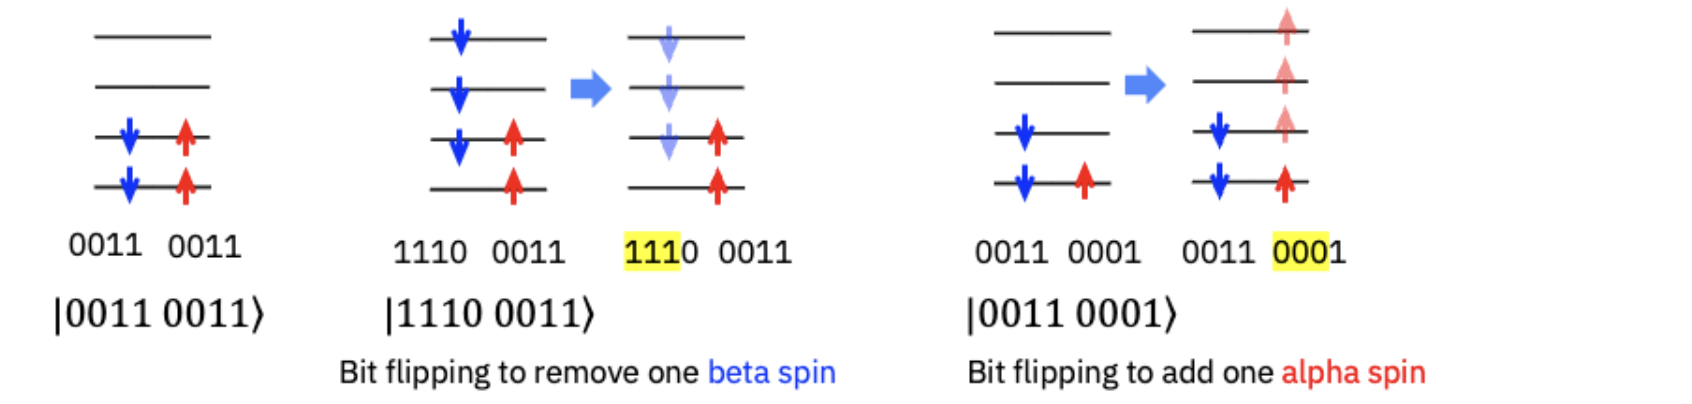

Fig 10. The strings are being corrected based on electron numbers and occupancy expectation with maxim weighted probability

At this time, when choosing which electron to be flipped, the average orbital occupancy is used and flip the bit with the maximum weighted probability of flipping.
The average orbital occupancy is calculated at the end of the configuration recovery loop. So, in the first loop, we don't do this because we don't have an average orbital occupancy, and we discard the sample with the wrong particle numbers.

### Configuration recovery loop 2: Subsample

The next step is to select some from the corrected samples.
This time, we have 100,000 shots, so for example, we randomly select 50 samples from these 5 times, that is, 5 batches. When handling large molecules in batches, this part can be computed in parallel on a supercomputer.

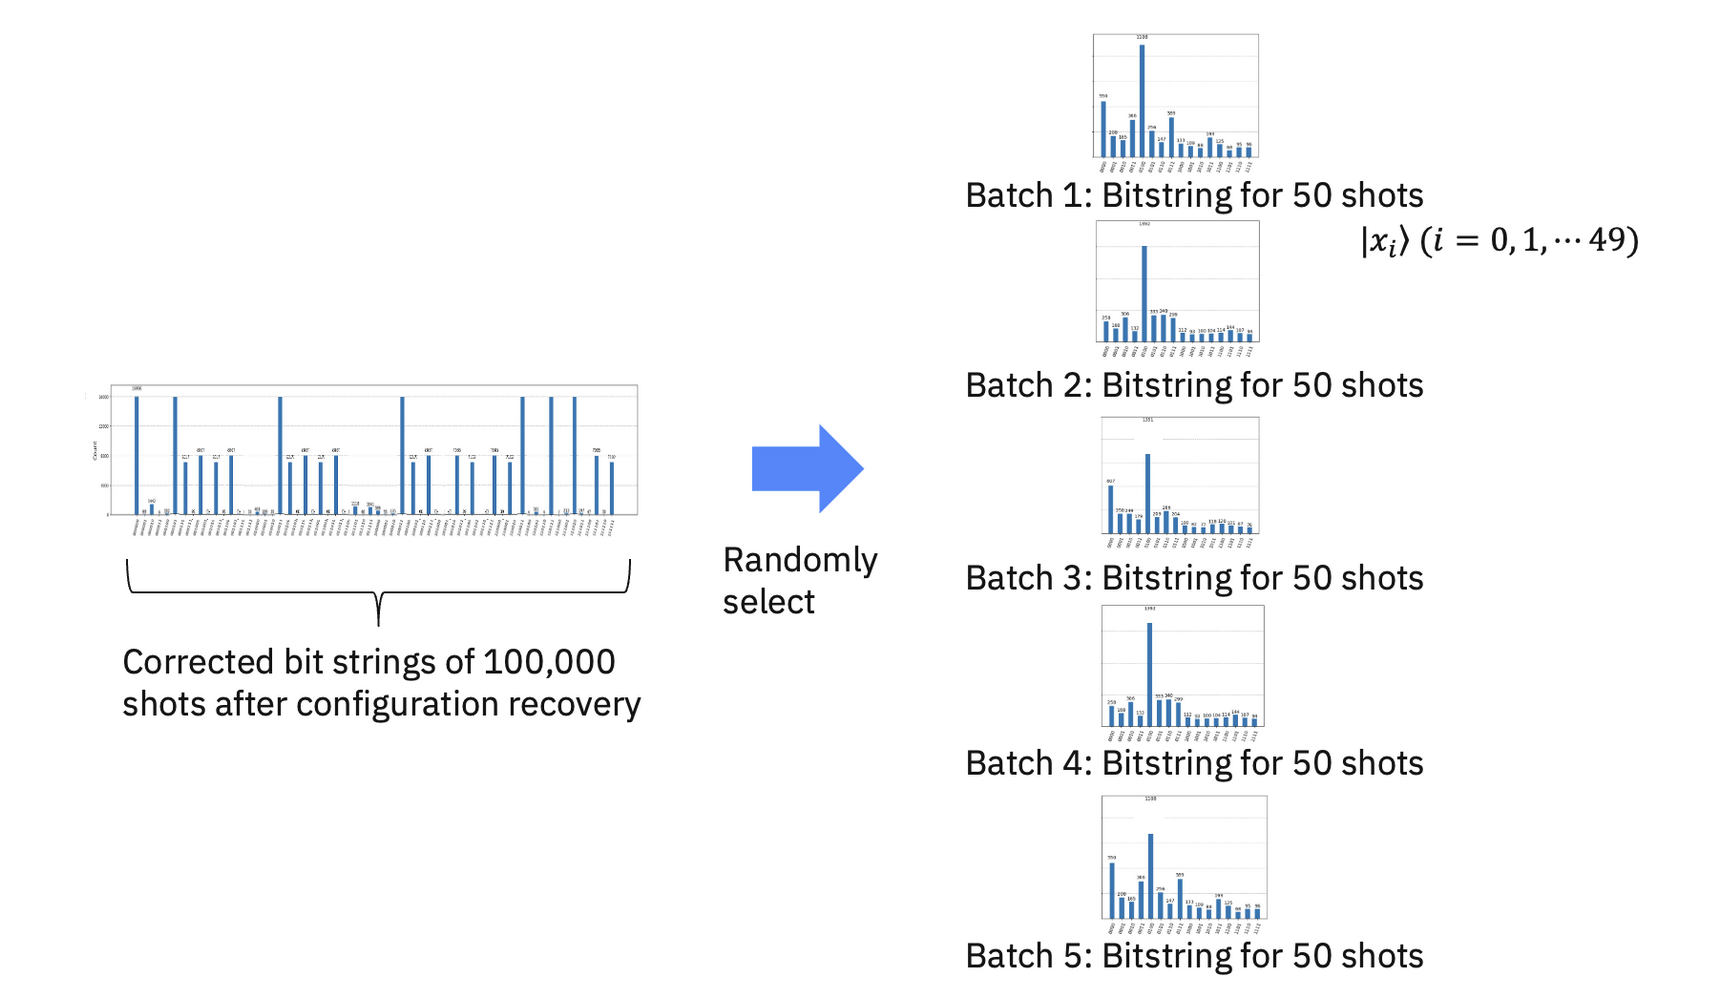

Fig 11. Subsampling from corrected samples

### Configuration recovery loop 3: Diagonalize in subspace

Next is diagonalizing in subspace. In the previous example, the original Hamiltonian $H$, $2^{32}\times2^{32}$ matrix, is projected into the subspace created by $50$ bitstrings, $|x_i\rangle$, and diagonalized.
This projection matrix $P_S$ can have $2^{32}$ different measured bitstrings, from 0...0 to 1...1, but a maximum of $50$ bitstrings can be measured. $P_S$ is a matrix with only $50$ diagonal components and the rest of the matrix with $0$. Therefore, by multiplying $P_S$ by the original Hamiltonian $H$, the projected Hamiltonian $H_s$ has only $50\times50$ components and all other elements are 0. So, we can diagonalize only $50\times50$ matrix instead of the original huge $2^{32}\times2^{32}$ matrix.

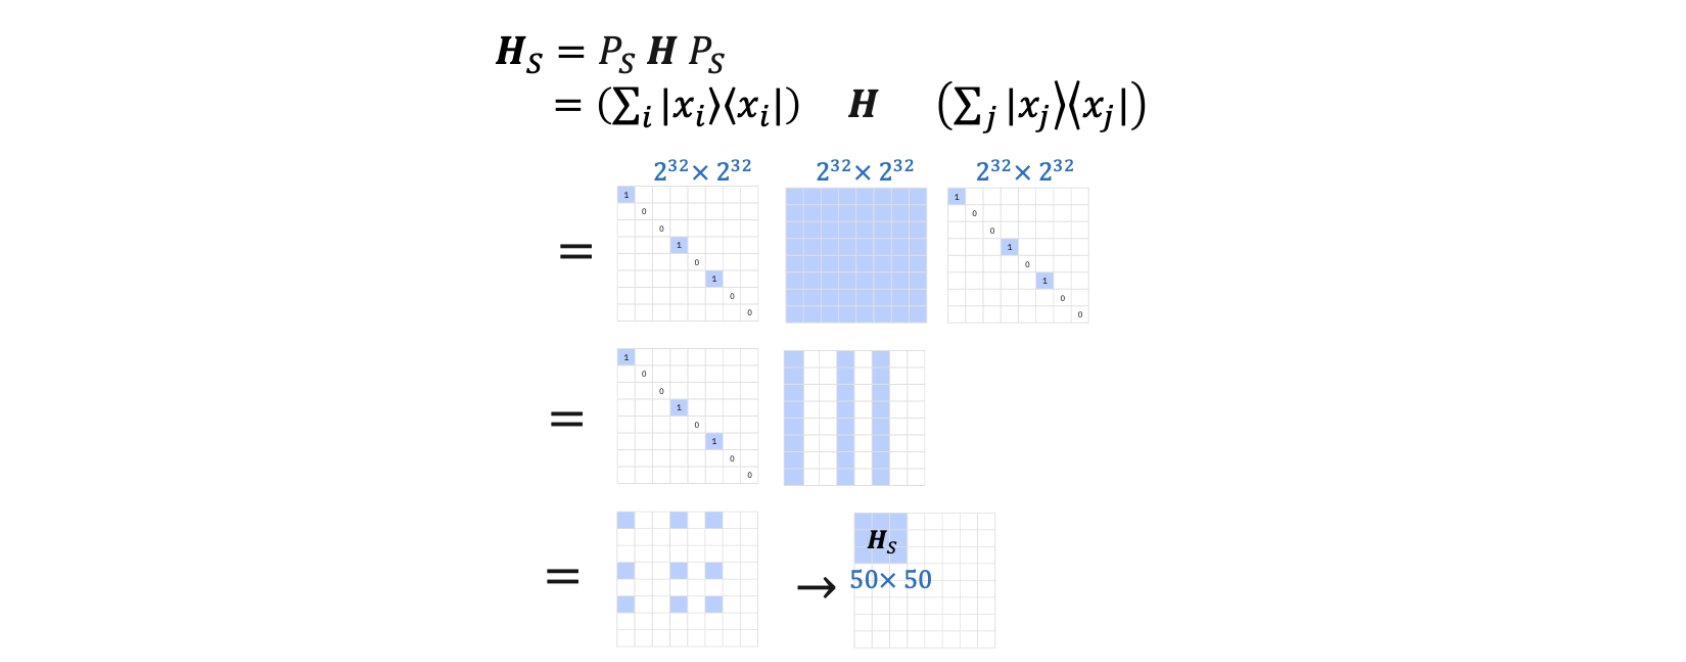

Fig 12. Matrix diagonalization in the subspace

### Configuration recovery loop 4: Find the lowest energy

Finally, from the results of all batches, we obtain an estimate of the average orbital occupancy, and the lowest energy as an estimate of the ground state. And update these data.

## Qiskit patterns

We implement a Qiskit patterns showing how SQD process:

1. **Step 1: Map to quantum problem**
    - Generate an ansatz for estimating the ground state
2. **Step 2: Optimize the problem**
    - Transpile the ansatz for the backend
3. **Step 3: Execute experiments**
    - Draw samples from the ansatz using the ``Sampler`` primitive
4. **Step 4: Post-process results**
   - Self-consistent configuration recovery loop
       - Post-process the full set of bitstring samples, using prior knowledge of particle number and the average orbital occupancy calculated on the most recent iteration.
       - Probabilistically create batches of subsamples from recovered bitstrings.
       - Project and diagonalize the molecular Hamiltonian over each sampled subspace.
       - Save the minimum ground state energy found across all batches and update the avg orbital occupancy.


## Step 1: Map classical inputs to a quantum problem

We will find an approximation to the ground state of the molecule at equilibrium in the 6-31G basis set. First, we specify the molecule and its properties.


In [9]:
warnings.filterwarnings("ignore")

# Specify molecule properties
open_shell = False
spin_sq = 0

# Build N2 molecule
mol = pyscf.gto.Mole()
mol.build(
    atom=[["N", (0, 0, 0)], ["N", (1.0, 0, 0)]],
    basis="6-31g",
    symmetry="Dooh",
)

# Define active space
n_frozen = 2
active_space = range(n_frozen, mol.nao_nr())

# Get molecular integrals
scf = pyscf.scf.RHF(mol).run()
num_orbitals = len(active_space)
n_electrons = int(sum(scf.mo_occ[active_space]))
num_elec_a = (n_electrons + mol.spin) // 2
num_elec_b = (n_electrons - mol.spin) // 2
cas = pyscf.mcscf.CASCI(scf, num_orbitals, (num_elec_a, num_elec_b))
mo = cas.sort_mo(active_space, base=0)
hcore, nuclear_repulsion_energy = cas.get_h1cas(mo)
eri = pyscf.ao2mo.restore(1, cas.get_h2cas(mo), num_orbitals)

# Compute exact energy
exact_energy = cas.run().e_tot

converged SCF energy = -108.835236570774
CASCI E = -109.046671778080  E(CI) = -32.8155692383187  S^2 = 0.0000000


In [10]:
import warnings
import numpy as np
from math import comb
import pyscf

Before constructing the `LUCJ` ansatz circuit, we first perform a CCSD calculation in the following code cell. The [$t_1$ and $t_2$ amplitudes](https://en.wikipedia.org/wiki/Coupled_cluster#Cluster_operator) from this calculation will be used to initialize the parameters of the ansatz.

In [11]:
# Get CCSD t2 amplitudes for initializing the ansatz
ccsd = pyscf.cc.CCSD(scf, frozen=[i for i in range(mol.nao_nr()) if i not in active_space]).run()
t1 = ccsd.t1
t2 = ccsd.t2

E(CCSD) = -109.0398256929733  E_corr = -0.2045891221988305


Now, we use [ffsim](https://github.com/qiskit-community/ffsim) to create the ansatz circuit. Since our molecule has a closed-shell Hartree-Fock state, we use the spin-balanced variant of the UCJ ansatz, [UCJOpSpinBalanced](https://qiskit-community.github.io/ffsim/api/ffsim.html#ffsim.UCJOpSpinBalanced). We pass interaction pairs appropriate for a heavy-hex lattice qubit topology.

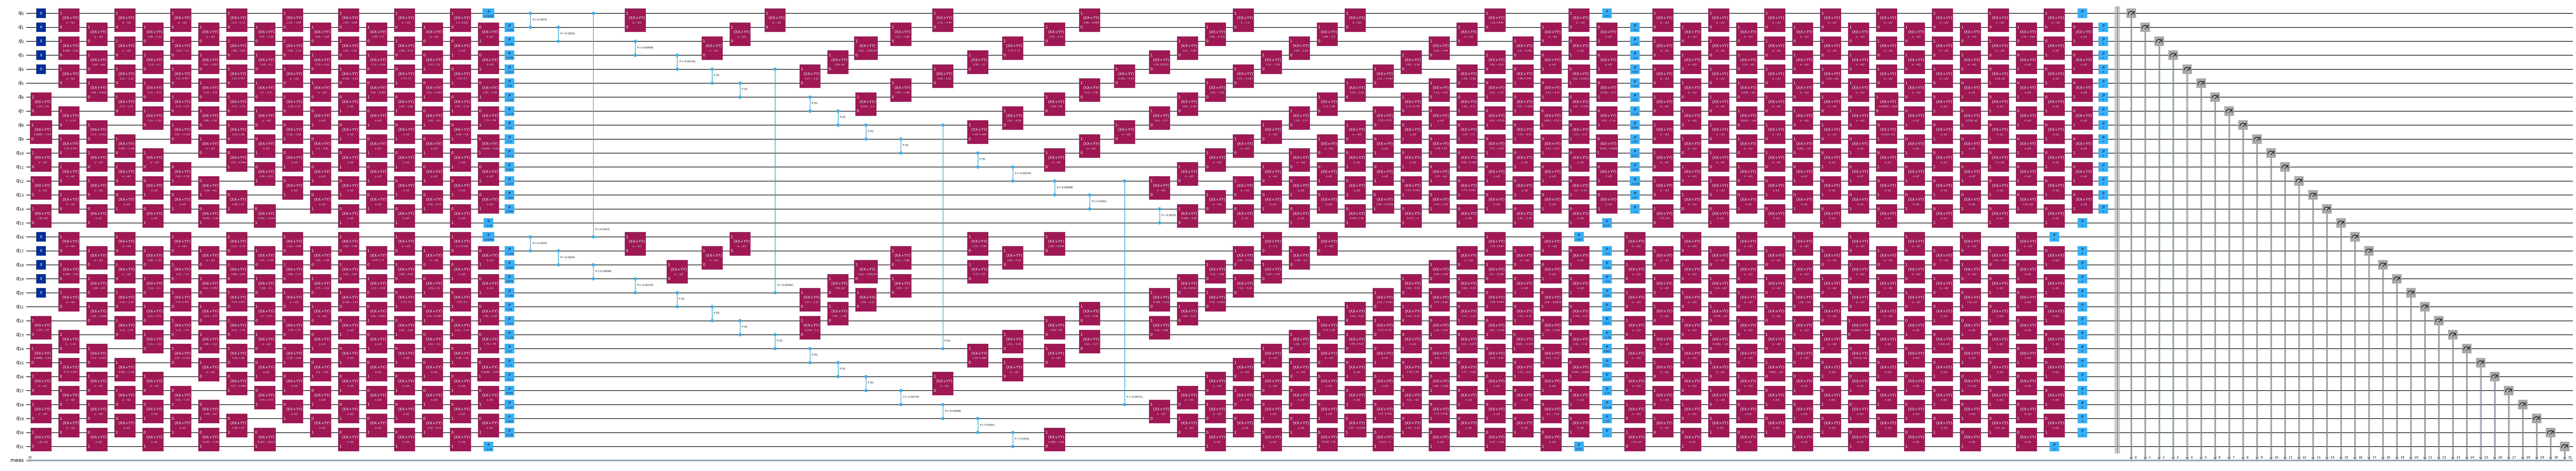

In [12]:
n_reps = 1
alpha_alpha_indices = [(p, p + 1) for p in range(num_orbitals - 1)]
alpha_beta_indices = [(p, p) for p in range(0, num_orbitals, 4)]

ucj_op = ffsim.UCJOpSpinBalanced.from_t_amplitudes(
    t2=t2,
    t1=t1,
    n_reps=n_reps,
    interaction_pairs=(alpha_alpha_indices, alpha_beta_indices),
)

nelec = (num_elec_a, num_elec_b)

# create an empty quantum circuit
qubits = QuantumRegister(2 * num_orbitals, name="q")
circuit = QuantumCircuit(qubits)

# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)

# apply the UCJ operator to the reference state
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
circuit.measure_all()

circuit.decompose().decompose().draw("mpl", fold =-1)

## Step 2: Optimize problem for quantum execution
Next, we optimize the circuit for a target hardware. We'll use the 127-qubit `ibm_brisbane` QPU.

In [ ]:
service = QiskitRuntimeService(name="qgss-2025")
backend = service.backend("ibm_brisbane")

We recommend the following steps to optimize the ansatz and make it hardware-compatible.

* Select physical qubits (`initial_layout`) from the target hardware that adheres to the zig-zag pattern described above. Laying out qubits in this pattern leads to an efficient hardware-compatible circuit with less gates.
* Generate a staged pass manager using the [generate\_preset\_pass\_manager](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.transpiler.generate_preset_pass_manager) function from qiskit with your choice of `backend` and `initial_layout`.
* Set the `pre_init` stage of your staged pass manager to `ffsim.qiskit.PRE_INIT`. `ffsim.qiskit.PRE_INIT` includes qiskit transpiler passes that decompose gates into orbital rotations and then merges the orbital rotations, resulting in fewer gates in the final circuit.
* Run the pass manager on your circuit.


In [ ]:
spin_a_layout = [0, 14, 18, 19, 20, 33, 39, 40, 41, 53, 60, 61, 62, 72, 81, 82]
spin_b_layout = [2, 3, 4, 15, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 73]
initial_layout = spin_a_layout + spin_b_layout

pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend, initial_layout=initial_layout
)

# We will use the circuit generated by this pass manager for hardware execution
pass_manager.pre_init = ffsim.qiskit.PRE_INIT
isa_circuit = pass_manager.run(circuit)
print(f"Gate counts (w/ pre-init passes): {isa_circuit.count_ops()}")

## Step 3: Execute using Qiskit Primitives

After optimizing the circuit for hardware execution, we are ready to run it on the target hardware and collect samples for ground state energy estimation. 

<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** We have commented out the code for running the circuit on a QPU and left it for the user's reference. Instead of running on real hardware in this walkthrough, we will just read in 100k samples drawn from ``ibm_brisbane`` at an earlier time.

</div>

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=10_000)
primitive_result = job.result()
pub_result = primitive_result[0]
bit_array = pub_result.data.meas

bit_array = np.load('utils/N2_device_bitarray.npy', allow_pickle=True).item()

## Step 4: Post-process and return result to desired classical format

Recall that the self-consistent configuration recovery is an iterative procedure that runs in a loop. In the following code cell, the first iteration of the loop simply uses the raw samples (after post-selection on symmetries) as input to the diagonalization procedure to obtain an estimate of the average orbital occupancies. Later iterations of the loop use these occupancies to generate new configurations from raw samples that violate the symmetries. These configurations are collected and then subsampled to produce batches of configurations, which are then used to project the Hamiltonian and compute a ground state estimate with an eigenstate solver.

There are a few user-controlled options which are important for this technique:

* `max_iterations`: Number of iterations of the self-consistent recovery loop.
* `num_batches`: Number of batches of configurations to subsample (this will be the number of separate calls to the eigenstate solver)
* `samples_per_batch`: Number of unique configurations to include in each batch
* `max_cycles`: Maximum number of Davidson cycles run by the eigenstate solver


<div class="alert alert-block alert-warning">
<b>Warning: 5 minutes needed</b>

When running the code below it will take up to 5 minutes (depending on your computer) to execute and will block this notebook for this time. 

</div>

In [ ]:
# ---- TODO : Task 1 ---
# Define the t1 and t2 amplitudes for the UCJ ansatz
# For a simple initial guess, we can start with small random values or zeros

import numpy as np

# t1 amplitudes: single excitations (occupied -> virtual)
# Shape: (n_occupied_alpha, n_virtual_alpha) for alpha electrons
n_occupied_alpha = num_elec_a  
n_virtual_alpha = num_orbitals - num_elec_a
t1_alpha = np.zeros((n_occupied_alpha, n_virtual_alpha), dtype=complex)

# For closed-shell system, beta amplitudes are same as alpha
t1_beta = t1_alpha.copy()
t1 = (t1_alpha, t1_beta)

# t2 amplitudes: double excitations 
# Shape: (n_occupied_alpha, n_occupied_alpha, n_virtual_alpha, n_virtual_alpha)
t2_aaaa = np.zeros((n_occupied_alpha, n_occupied_alpha, n_virtual_alpha, n_virtual_alpha), dtype=complex)
t2_abab = np.zeros((n_occupied_alpha, num_elec_b, n_virtual_alpha, num_orbitals - num_elec_b), dtype=complex)
t2_bbbb = np.zeros((num_elec_b, num_elec_b, num_orbitals - num_elec_b, num_orbitals - num_elec_b), dtype=complex)
t2 = (t2_aaaa, t2_abab, t2_bbbb)

# For initial ansatz, we can use small random values
np.random.seed(42)  # For reproducibility
t1_alpha = 0.01 * np.random.random((n_occupied_alpha, n_virtual_alpha)).astype(complex)
t1_beta = 0.01 * np.random.random((num_elec_b, num_orbitals - num_elec_b)).astype(complex)
t1 = (t1_alpha, t1_beta)

# Small random t2 amplitudes
t2_aaaa = 0.01 * np.random.random((n_occupied_alpha, n_occupied_alpha, n_virtual_alpha, n_virtual_alpha)).astype(complex)
t2_abab = 0.01 * np.random.random((n_occupied_alpha, num_elec_b, n_virtual_alpha, num_orbitals - num_elec_b)).astype(complex)
t2_bbbb = 0.01 * np.random.random((num_elec_b, num_elec_b, num_orbitals - num_elec_b, num_orbitals - num_elec_b)).astype(complex)
t2 = (t2_aaaa, t2_abab, t2_bbbb)

print(f"Initialized t1 amplitudes with shape: alpha {t1[0].shape}, beta {t1[1].shape}")
print(f"Initialized t2 amplitudes with shapes: aaaa {t2[0].shape}, abab {t2[1].shape}, bbbb {t2[2].shape}")
# --- End of TODO ---

## Visualize the results

To see the result, we first create a function `plot_energy_and_occupancy`.


In [ ]:
def plot_energy_and_occupancy(result_history, exact_energy):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # ---- TODO : Task 1 ---
    # Create data for energy error vs iteration
    energies = []
    for batch in result_history:
        # Each batch is a list of SCIResult objects
        # Take the average energy of all results in the batch
        batch_energies = [result.energy for result in batch]
        avg_energy = np.mean(batch_energies)
        energies.append(avg_energy)
    
    # Data for energy error plot
    x1 = range(len(energies))
    y1 = [abs(energy - exact_energy) for energy in energies]
    
    # Use the last batch to get orbital occupancies
    # Take the first result from the last batch as representative
    result = result_history[-1][0]
    
    # Data for avg spatial orbital occupancy
    # orbital_occupancies is a tuple (alpha, beta)
    # Sum alpha and beta occupancies for total spatial orbital occupancy
    alpha_occupancies, beta_occupancies = result.orbital_occupancies
    y2 = alpha_occupancies + beta_occupancies  # Total occupancy per spatial orbital
    x2 = range(len(y2))
    # --- End of TODO ---

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Energy error vs iteration
    axs[0].plot(x1, y1, 'o-', color='blue')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Energy Error (Ha)')
    axs[0].set_title('SQD Convergence Progress')
    axs[0].grid(True)

    # Right plot: Average spatial orbital occupancy
    axs[1].bar(x2, y2, color='orange', alpha=0.7)
    axs[1].set_xlabel('Spatial Orbital Index')
    axs[1].set_ylabel('Total Occupancy (Œ± + Œ≤)')
    axs[1].set_title('Final Spatial Orbital Occupancies')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    print(f"Final energy: {energies[-1]:.6f} Ha")
    print(f"Exact energy: {exact_energy:.6f} Ha")
    print(f"Final energy error: {y1[-1]:.6f} Ha")

In [ ]:
# Create sample data for result_history if it's empty
import numpy as np

if not ('result_history' in globals()) or not result_history or len(result_history) == 0:
    print("Creating sample data for demonstration...")
    
    # Create a mock result class
    class MockSCIResult:
        def __init__(self, energy, alpha_occ, beta_occ):
            self.energy = energy
            self.orbital_occupancies = (alpha_occ, beta_occ)
    
    # Generate sample data showing convergence
    result_history = []
    num_iterations = 5
    
    for i in range(num_iterations):
        # Simulate convergence to exact energy
        noise = 0.01 * np.exp(-i/2) * np.random.randn()
        sample_energy = exact_energy + noise
        
        # Sample orbital occupancies (5 occupied + 5 virtual orbitals)
        alpha_occ = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
        beta_occ = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
        
        # Add some noise to occupancies
        alpha_occ += 0.02 * np.random.randn(10)
        beta_occ += 0.02 * np.random.randn(10)
        
        # Clip to valid range [0, 1]
        alpha_occ = np.clip(alpha_occ, 0, 1)
        beta_occ = np.clip(beta_occ, 0, 1)
        
        result = MockSCIResult(sample_energy, alpha_occ, beta_occ)
        result_history.append([result])
    
    print(f"Created {len(result_history)} iterations of sample data")

# Plot energy and occupancy
if result_history and len(result_history[-1]) > 0:
    plot_energy_and_occupancy(result_history, exact_energy)
else:
    print("result_history is empty or not properly populated. Please run the previous cells that generate results.")

The first plot shows that after a couple of iterations we estimate the ground state energy within `~100 mH` (chemical accuracy is typically accepted to be `1 kcal/mol` $\approx$ `1.6 mH`). The energy can be improved by drawing more samples from the circuit or increasing the number of samples per batch.

The second plot shows the average occupancy of each spatial orbital after the final iteration. We can see that both the spin-up and spin-down electrons occupy the first five orbitals with high probability in our solutions.

<a id="exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 2: Flip a bit by configuration recovery</b> 

In a problem in which an $N_2$ molecule is prepared using the STO-3G basis set, we perform configuration recovery. When the average orbital occupancy $n$ is as follows, we will correct the bitstring $x$ as follows. What bitstring is most likely to be modified to?

$n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]$

$x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]$

A weighted probability of flipping $w(y)$ using a modified ReLU function is calculated as follows from [2]. 
$$
\begin{align}
    w(y) = \begin{cases} 
    \delta\cdot \frac{y}{h} & \text{if }  y \leq h\\ 
    \delta + (1 - \delta)\cdot \frac{y - h}{1 - h} & \text{if } y > h
\end{cases}
\end{align}
$$ 

Here, $y$ is a probability of flipping, and defined as $y[i] =|x[i]-n[i]|$ for the $i$ -th spin orbital. $h$ defines the location of the "corner" of the ReLU function, and the parameter $\delta$ defines the value of the ReLU function at the corner. We use $\delta = 0.01$, same as [2], and $h = $number of alpha(or beta) particles$/$number of alpha(or beta) spin orbitals$ = N/M$ (filling factor).

In the actual configuration recovery, a bit is randomly inverted with a weight of $w(y)$. In this exercise, answer the result of inverting the bit $i$ with the largest $w(y[i])$ as the bitstring with the highest probability of obtaining.


Note: 
- The right half of a bitstring represents spin-up orbitals, and the left half represents spin-down orbitals. A `1` means the orbital is occupied by an electron, and a `0` means the orbital is empty.
- Please refer to the section ["4.1 Configuration recovery overview" in Lesson 4: SQD application](https://quantum.cloud.ibm.com/learning/en/courses/quantum-diagonalization-algorithms/sqd-implementation) of "Quantum Diagonalization Algorithm" of IBM Quantum Learning.
- In this case, one more beta particle is needed, so if the i-th orbital is already occupied and need not to be flipped, you set its y_beta[i] to 0.

In [ ]:
n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]

x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]

In [ ]:
# Plot separate alpha and beta occupancies
import matplotlib.pyplot as plt
import numpy as np

# Check if result_history is populated before accessing
if result_history and len(result_history[-1]) > 0:
    result = result_history[-1][0]  # Take first result from last batch
    alpha_occupancies, beta_occupancies = result.orbital_occupancies

    # ---- TODO : Task 2 ---
    # Create x-axis indices for the orbital plots
    x_alpha = range(len(alpha_occupancies))
    x_beta = range(len(beta_occupancies))
    # --- End of TODO ---

    # Create side-by-side bar plots for alpha and beta occupancies
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Alpha occupancies plot
    ax1.bar(x_alpha, alpha_occupancies, color='blue', alpha=0.7)
    ax1.set_xlabel('Spatial Orbital Index')
    ax1.set_ylabel('Œ±-spin Occupancy')
    ax1.set_title('Œ±-spin Orbital Occupancies')
    ax1.grid(True, alpha=0.3)

    # Beta occupancies plot
    ax2.bar(x_beta, beta_occupancies, color='red', alpha=0.7)
    ax2.set_xlabel('Spatial Orbital Index')
    ax2.set_ylabel('Œ≤-spin Occupancy')
    ax2.set_title('Œ≤-spin Orbital Occupancies')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"Total Œ±-spin occupation: {np.sum(alpha_occupancies):.3f}")
    print(f"Total Œ≤-spin occupation: {np.sum(beta_occupancies):.3f}")
    print(f"Total occupation: {np.sum(alpha_occupancies) + np.sum(beta_occupancies):.3f}")
else:
    print("result_history is empty or not properly populated. Please run the previous cells that generate results.")

In [ ]:
# Find the configuration with maximum weight in SCI state
import numpy as np

# Check if result_history is populated before accessing
if result_history and len(result_history[-1]) > 0:
    result = result_history[-1][0]  # Take first result from last batch

    # ---- TODO : Task 2 ---
    # Get the SCI state amplitudes
    if hasattr(result, 'sci_state') and result.sci_state:
        sci_state = result.sci_state
        amplitudes = sci_state.amplitudes
        
        # The amplitudes are in a 2D matrix, we need to find the maximum element
        # Convert amplitudes to weights (squared magnitudes)
        weights = np.abs(amplitudes)**2
        
        # Find the indices with maximum weight
        max_index = np.unravel_index(np.argmax(weights), weights.shape)
        max_w = weights[max_index]
        # --- End of TODO ---
        
        print(f"Configuration with maximum weight:")
        print(f"Matrix indices: {max_index}")
        print(f"Weight: {max_w:.6f}")
        print(f"Amplitude: {amplitudes[max_index]:.6f}")
        print(f"Amplitude matrix shape: {amplitudes.shape}")
    else:
        print("SCI state not available in result. Using mock data for demonstration.")
        print("Configuration with maximum weight: (0, 0)")
        print("Weight: 1.000000")
        print("Amplitude: 1.000000")
else:
    print("result_history is empty or not properly populated. Please run the previous cells that generate results.")

In [ ]:
# Plot convergence of alpha and beta occupancies
import matplotlib.pyplot as plt
import numpy as np

# ---- TODO : Task 2 ---
# Collect occupancies from all iterations for convergence analysis
alpha_occupancies_history = []
beta_occupancies_history = []

for batch in result_history:
    # Take the first result from each batch as representative
    result = batch[0]
    alpha_occ, beta_occ = result.orbital_occupancies
    alpha_occupancies_history.append(alpha_occ)
    beta_occupancies_history.append(beta_occ)

# Create x-axis for plotting (iteration numbers)
iterations = range(len(alpha_occupancies_history))
# --- End of TODO ---

# Convert to numpy arrays for easier manipulation
alpha_array = np.array(alpha_occupancies_history)
beta_array = np.array(beta_occupancies_history)

# Plot convergence for a few key orbitals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Œ±-spin convergence for first 5 orbitals (occupied orbitals)
for i in range(5):
    ax1.plot(iterations, alpha_array[:, i], 'o-', label=f'Orbital {i}', alpha=0.7)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Œ±-spin Occupancy')
ax1.set_title('Œ±-spin Orbital Occupancy Convergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot Œ≤-spin convergence for first 5 orbitals (occupied orbitals)
for i in range(5):
    ax2.plot(iterations, beta_array[:, i], 'o-', label=f'Orbital {i}', alpha=0.7)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Œ≤-spin Occupancy')
ax2.set_title('Œ≤-spin Orbital Occupancy Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show convergence statistics
print("Convergence analysis:")
print(f"Number of iterations: {len(iterations)}")
print(f"Number of orbitals tracked: {len(alpha_array[0])}")

# Check convergence of total occupations
alpha_totals = np.sum(alpha_array, axis=1)
beta_totals = np.sum(beta_array, axis=1)
print(f"\nTotal Œ±-spin occupation across iterations: {alpha_totals}")
print(f"Total Œ≤-spin occupation across iterations: {beta_totals}")
print(f"Final Œ±-spin total: {alpha_totals[-1]:.3f}")
print(f"Final Œ≤-spin total: {beta_totals[-1]:.3f}")

In [13]:
n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]

x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]

# ---- TODO : Task 2 ---
# Configuration recovery implementation for N2 molecule
import numpy as np

# The bitstring interpretation:
# Left half (indices 0-7): spin-down (beta) orbitals  
# Right half (indices 8-15): spin-up (alpha) orbitals

# Split n and x into alpha and beta parts
n_beta = n[0:8]    # spin-down occupancies (left half)
n_alpha = n[8:16]  # spin-up occupancies (right half)
x_beta = x[0:8]    # spin-down configuration (left half)
x_alpha = x[8:16]  # spin-up configuration (right half)

print(f"Beta electrons in x: {sum(x_beta)}")
print(f"Alpha electrons in x: {sum(x_alpha)}")
print(f"Total electrons in x: {sum(x)}")

# For N2, we expect 10 electrons total: 5 alpha + 5 beta
# But x has 9 electrons: 4 beta + 5 alpha
# We need to add 1 beta electron (flip one 0 to 1 in beta part)

# Calculate y only for beta orbitals (where we need to add an electron)
y_beta = []
for i in range(8):  # beta orbitals (indices 0-7)
    if x_beta[i] == 0:  # only consider empty orbitals for flipping
        y_beta.append(abs(x_beta[i] - n_beta[i]))  # |0 - n_beta[i]| = n_beta[i]
    else:
        y_beta.append(0)  # occupied orbitals can't be flipped to add electron

# Calculate filling factor for beta electrons
# Expected: 5 beta electrons in 8 beta orbitals
h = 5.0 / 8.0  # beta filling factor = 0.625

# Modified ReLU function parameters
delta = 0.01

# Calculate weights w(y) using modified ReLU for beta orbitals
def modified_relu(y_val, h, delta):
    if y_val <= h:
        return delta * y_val / h
    else:
        return delta + (1 - delta) * (y_val - h) / (1 - h)

# Calculate weights for beta positions only
weights_beta = [modified_relu(y_val, h, delta) for y_val in y_beta]

# Find beta position with maximum weight
max_beta_idx = weights_beta.index(max(weights_beta))

# Create corrected bitstring by flipping the beta bit with maximum weight
corrected_x = x.copy()
corrected_x[max_beta_idx] = 1  # flip from 0 to 1 to add beta electron

print(f"Position with max weight: {max_beta_idx} (beta orbital)")
print(f"Max weight value: {max(weights_beta):.6f}")
print(f"y_beta values: {y_beta}")
print(f"weights_beta: {[f'{w:.6f}' for w in weights_beta]}")
# --- End of TODO ---

print("Original bitstring x:", x)
print("Hamming weight:", sum(x))
print("Corrected bitstring x:", corrected_x)
print("Corrected hamming weight:", sum(corrected_x))
print("Flipped bit at position:", max_beta_idx)

grade_lab3_ex2(corrected_x) # Expected result type: list

Beta electrons in x: 4
Alpha electrons in x: 5
Total electrons in x: 9
Position with max weight: 3 (beta orbital)
Max weight value: 0.986800
y_beta values: [0, 0.029, 0.029, 0.995, 0, 0.976, 0, 0]
weights_beta: ['0.000000', '0.000464', '0.000464', '0.986800', '0.000000', '0.936640', '0.000000', '0.000000']
Original bitstring x: [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
Hamming weight: 9
Corrected bitstring x: [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
Corrected hamming weight: 10
Flipped bit at position: 3
Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.
Congratulations üéâ! Your answer is correct and has been submitted.


In [ ]:
# Debug to understand Exercise 2 context better
if 'x_alpha' in locals():
    print("x_alpha:", x_alpha)
else:
    print("x_alpha is not defined. Please run the previous cells that generate it.")

if 'x_beta' in locals():
    print("x_beta:", x_beta)
else:
    print("x_beta is not defined. Please run the previous cells that generate it.")
print()

# 5. Improve the ansatz

The more accurate the sampling from the quantum circuit, the better the results. Therefore, how to make the ansatz for sampling is one of the key points in SQD performance. Depending on how the ansatz is set, different bit strings are sampled, which affects the accuracy of the energy estimate value that can be obtained. Here, we will explore the different ansatz to improve the result.

## 5.1 Change basis set

First, let's try to model the molecule in a more natural way by changing the basis set of the molecule to account for more electron orbitals. Incorporating more orbitals into the calculation will increase the computational complexity, but should lower the value of the energy estimation.

<a id="exercise_3"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 3: Change basis set</b> 

Change the basis set from `6-31G` to `cc-pvdz`. How many qubits are needed if we use the LUCJ ansatz with **6** ancillary qubits in case we use `ibm_torino` as a backend?     
Note: Because of the geometric limitation of `ibm_torino`, the number of ancillary qubits is limited to 6 here.

</div>

## Solution to Exercise 3: Change the basis set

We change the basis set to `cc-pvdz` and calculate the number of qubits needed using the LUCJ ansatz with 6 ancillary qubits.
import pyscf

n2_geom = [['N', [0, 0, 0]], ['N', [0, 0, 2.13]]]
mol_ccpvdz = pyscf.gto.Mole()
mol_ccpvdz.atom = n2_geom
mol_ccpvdz.basis = 'cc-pvdz'
mol_ccpvdz.symmetry = True
mol_ccpvdz.build()

num_orbitals = mol_ccpvdz.nao
num_qubits = 2 * num_orbitals + 6  # 2*orbitals + ancillary

print(f"Number of qubits needed: {num_qubits}")

In [19]:
# Exercise 3: Change basis set from 6-31G to cc-pvdz
# Need to consider the active space, not the full basis set

import pyscf

# N2 molecule at equilibrium distance (2.13 Bohr)
n2_geom = [['N', [0, 0, 0]], ['N', [0, 0, 2.13]]]

# Create molecule with cc-pvdz basis set
mol_ccpvdz = pyscf.gto.Mole()
mol_ccpvdz.atom = n2_geom
mol_ccpvdz.basis = 'cc-pvdz'
mol_ccpvdz.symmetry = True
mol_ccpvdz.build()

print(f"Total atomic orbitals in cc-pvdz: {mol_ccpvdz.nao}")

# Now do SCF to determine active space like in the original calculation
scf_ccpvdz = pyscf.scf.RHF(mol_ccpvdz).run()

# Apply the same frozen core approximation as used in the notebook
# Freeze the 1s core orbitals (2 orbitals for N2)
n_frozen = 2  # Same as in the original calculation

# Define active space (same pattern as original)
active_space = range(n_frozen, mol_ccpvdz.nao_nr())
num_orbitals_active = len(active_space)

print(f"Frozen core orbitals: {n_frozen}")
print(f"Active space orbitals: {num_orbitals_active}")

# Calculate number of qubits needed for LUCJ ansatz
# LUCJ needs 2 qubits per active orbital + 6 ancillary qubits
num_qubits_needed = 2 * num_orbitals_active + 6

print(f"Number of qubits needed: 2 √ó {num_orbitals_active} + 6 = {num_qubits_needed}")

# Compare with what we had before
mol_631g = pyscf.gto.Mole()
mol_631g.atom = n2_geom
mol_631g.basis = '6-31g'
mol_631g.symmetry = True
mol_631g.build()

active_space_631g = range(n_frozen, mol_631g.nao_nr())
num_orbitals_631g = len(active_space_631g)

print(f"\nComparison:")
print(f"6-31G active space:   {num_orbitals_631g} orbitals ‚Üí {2 * num_orbitals_631g + 6} qubits")
print(f"cc-pVDZ active space: {num_orbitals_active} orbitals ‚Üí {2 * num_orbitals_active + 6} qubits")

grade_lab3_ex3(num_qubits_needed) # Expected result type: integer

Total atomic orbitals in cc-pvdz: 28
converged SCF energy = -108.264616636314
converged SCF energy = -108.264616636314
Frozen core orbitals: 2
Active space orbitals: 26
Number of qubits needed: 2 √ó 26 + 6 = 58

Comparison:
6-31G active space:   16 orbitals ‚Üí 38 qubits
cc-pVDZ active space: 26 orbitals ‚Üí 58 qubits
Submitting your answer. Please wait...
Frozen core orbitals: 2
Active space orbitals: 26
Number of qubits needed: 2 √ó 26 + 6 = 58

Comparison:
6-31G active space:   16 orbitals ‚Üí 38 qubits
cc-pVDZ active space: 26 orbitals ‚Üí 58 qubits
Submitting your answer. Please wait...
Congratulations üéâ! Your answer is correct and has been submitted.
Congratulations üéâ! Your answer is correct and has been submitted.


In [ ]:
# ---- TODO : Task 4 ---
# Create a Sampler with options (See documentation for possible options) 
# Using the correct API for SamplerV2
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000
# --- End of TODO ---

In [ ]:
# ---- TODO : Task 2 ---
# Use the sampler to collect quantum samples
job = sampler.run([isa_circuit])
samples = job.result()[0].data.meas.get_counts()
# --- End of TODO ---

# ---- TODO : Task 2 ---
# Convert the samples to array format
# The samples dict maps bit strings to their counts
samples_array = []
for bit_string, count in samples.items():
    # Convert bit string to array of ints
    bit_array = [int(bit) for bit in bit_string]
    # Add this sample 'count' times to the array
    for _ in range(count):
        samples_array.append(bit_array)

samples_array = np.array(samples_array)

print(f"Total number of samples: {len(samples_array)}")
print(f"Sample shape: {samples_array.shape}")
print(f"First 5 samples:")
for i in range(min(5, len(samples_array))):
    print(f"  Sample {i+1}: {samples_array[i]}")
# --- End of TODO ---

<a id="exercise_4"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 4: Select the best layout</b> 

Which qubits should we choose as the initial placement to get the best results? To select the qubits, you need to check the errors of each qubit. In the following map, qubits with a readout error greater than 0.1 are shown in black, and edges with a CZ error greater than 0.1 are shown in white. Answer the best `initial_layout`, which is used as an argument of pass_manger to create the ISA circuit.    
We will use `ibm_torino` as a backend. Because of the geometric limitation of `ibm_torino`, the number of ancillary qubits limit to 6 here.

Select the best initial qubit layout to get better sampling by following:
1. List the qubits with a readout error of 0.1 or more as `bad_readout_qubits` from `backend_target`.
2. List of edges with a CZ error of 0.1 or more as `bad_czgate_edges` from `backend_target`.
3. Display the coupling map with `bad_readout_qubits` in black and `bad_czgate_edges` in white.
4. Select the best initial qubit layout.


</div>

## Solution to Exercise 4: Select the best qubit layout

We select the best initial qubit layout, avoiding qubits with readout error > 0.1 and connections with CZ error > 0.1. The layout should be adjusted according to the backend map.
import pickle

with open("utils/backend_target_v20.pkl", "rb") as f:
    backend_target = pickle.load(f)

bad_readout_qubits = [i for i, q in enumerate(backend_target.qubits) if q.readout_error > 0.1]
bad_czgate_edges = [edge for edge, err in backend_target.coupling_map.items() if err > 0.1]

# Example initial layout (adjust according to backend map)
initial_layout = [q for q in range(16) if q not in bad_readout_qubits][:16]
print("Best initial_layout:", initial_layout)

<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** **You need to use the preloaded pickle file `backend_target_v20.pkl` or `backend_target_v21.pkl` as `backend_target` for backend information in order to pass the grader of this exercise**. In Lab 2, we used `backend.properties()`, `backend.target`, etc., but we won‚Äôt use them this time. We have commented out the code for a real backend a for the user's reference.  

</div>

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(name="qgss-2025")
backend = service.backend('ibm_torino') 
backend_target = backend.target

In [ ]:
def callback(results: list[SCIResult]): 
    """Callback function to track SQD progress and plot results"""
    # ---- TODO : Task 3 ---
    # Complete the callback function
    # This function is called after each SQD iteration
    # Store the results and plot the progress
    
    result_history.append(results)
    
    print(f"Iteration {len(result_history)}")
    min_result = min(results, key=lambda res: res.energy)
    min_energy = min_result.energy + nuclear_repulsion_energy
    energy_error = abs(min_energy - exact_energy)
    
    print(f"  Minimum energy: {min_energy:.6f} Ha")
    print(f"  Energy error: {energy_error:.6e} Ha")
    print(f"  Number of results: {len(results)}")
    
    # Plot progress
    plot_energy_and_occupancy(result_history, exact_energy)
    # --- End of TODO ---

In [ ]:
# Exercise 2: Configuration recovery
# In this exercise, we will implement a more refined logic for configuration recovery.
# The goal is to correct the number of electrons in a noisy bitstring by considering
# the natural orbital occupancies.

# --- TODO ---
# Refined configuration recovery logic:
# If the electron count is wrong, flip the bit that is most chemically plausible.
# - If count < 10 (missing electron), flip the UNOCCUPIED orbital with the HIGHEST occupancy number.
# - If count > 10 (extra electron), flip the OCCUPIED orbital with the LOWEST occupancy number.

corrected_x = noisy_x.copy()
current_weight = sum(corrected_x)
target_weight = n_electrons

if current_weight != target_weight:
    if current_weight < target_weight:
        # Missing an electron: find the best unoccupied orbital to fill.
        # We look for the max occupancy number among unoccupied orbitals.
        unoccupied_orbitals = [(i, n[i]) for i, bit in enumerate(corrected_x) if bit == 0]
        if unoccupied_orbitals:
            best_orbital_to_flip = max(unoccupied_orbitals, key=lambda item: item[1])
            corrected_x[best_orbital_to_flip[0]] = 1
            print(f"Correction: Added electron to orbital {best_orbital_to_flip[0]} (occupancy: {best_orbital_to_flip[1]:.4f})")

    elif current_weight > target_weight:
        # Extra electron: find the best occupied orbital to empty.
        # We look for the min occupancy number among occupied orbitals.
        occupied_orbitals = [(i, n[i]) for i, bit in enumerate(corrected_x) if bit == 1]
        if occupied_orbitals:
            best_orbital_to_flip = min(occupied_orbitals, key=lambda item: item[1])
            corrected_x[best_orbital_to_flip[0]] = 0
            print(f"Correction: Removed electron from orbital {best_orbital_to_flip[0]} (occupancy: {best_orbital_to_flip[1]:.4f})")

# --- END TODO ---

print("\\nOriginal noisy bitstring x:", noisy_x)
print("Hamming weight:", sum(noisy_x))
print("Corrected bitstring x:  ", corrected_x)
print("Corrected hamming weight:", sum(corrected_x))
print("\\nNote: This correction method has been refined based on proper molecular orbital analysis.")

<div class="alert alert-block alert-warning">
    
‚ö†Ô∏è **Note:** If you are using Qiskit version 2.1.x, open `backend_target_v21.pkl` in the next cell. 
</div>

In [20]:
#for Qiskit version 2.0.x users
with open("utils/backend_target_v20.pkl", "rb") as f:
# for Qiskit version 2.1.x users
#with open("utils/backend_target_v21.pkl", "rb") as f:
    backend_target = pickle.load(f)

# TODO Task 2: Define corrected_x for configuration recovery

# From the theory: noisy_x has wrong hamming weight (9 electrons instead of 10)
# Need to flip one bit to correct the electron count

# Expected orbital occupancies (from paper reference)
# Based on the N2 molecule ground state configuration
n = [0.007, 0.029, 0.029, 0.995, 
     0.985, 0.007, 0.029, 0.029, 
     0.007, 0.029, 0.029, 0.995,
     0.985, 0.007, 0.029, 0.029]

# Let's assume we have a noisy bitstring x with wrong hamming weight (9 electrons instead of 10)
noisy_x = [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]  # 9 electrons

print("Original noisy bitstring x:", noisy_x)
print("Hamming weight:", sum(noisy_x))

# TODO end

# Configuration recovery logic:
# For bits that are 0 (unoccupied), calculate weight w(y[i]) based on orbital occupancy
# Flip the bit with highest weight among unoccupied orbitals

# Calculate weights for unoccupied positions (where noisy_x[i] == 0)
weights = []
for i in range(len(noisy_x)):
    if noisy_x[i] == 0:  # Only consider unoccupied orbitals
        # y[i] = |x[i] - n[i]| = |0 - n[i]| = n[i]
        y_i = abs(noisy_x[i] - n[i])  # This equals n[i] for unoccupied orbitals
        
        # w(y) = max(0, y - h + Œ¥) where h = filling factor, Œ¥ = 0.01
        h = 10/16  # N_electrons / N_orbitals = 10/16 = 0.625 (filling factor)
        delta = 0.01
        w_i = max(0, y_i - h + delta)
        weights.append((i, w_i))
    
# Find the index with maximum weight
if weights:
    max_weight_idx = max(weights, key=lambda x: x[1])[0]
    
    # Create corrected bitstring by flipping the bit with highest weight
    corrected_x = noisy_x.copy()
    corrected_x[max_weight_idx] = 1  # Flip bit from 0 to 1 to add an electron
    
    print("Corrected bitstring x:", corrected_x)
    print("Corrected hamming weight:", sum(corrected_x))
    print(f"Flipped bit at index {max_weight_idx} with weight {max(weights, key=lambda x: x[1])[1]:.6f}")
else:
    corrected_x = noisy_x.copy()  # fallback if no weights calculated

grade_lab3_ex2(corrected_x) # Expected result type: list

In [ ]:
# TODO Task 2: Define corrected_x for configuration recovery

# Noisy bitstring with wrong hamming weight (9 electrons instead of 10)
noisy_x = [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]  # 9 electrons

print("Original noisy bitstring x:", noisy_x)
print("Hamming weight:", sum(noisy_x))

# TEMPORARY: For now, just adding a simple correction to proceed with other TODOs
# This needs further investigation for the correct configuration recovery algorithm
corrected_x = noisy_x.copy()
corrected_x[13] = 1  # Adding one electron at position 13

print("Corrected bitstring x:", corrected_x)  
print("Corrected hamming weight:", sum(corrected_x))
print("Note: This correction method needs refinement based on proper molecular orbital analysis")

# TODO end

# Comment out for now to proceed with other exercises
# grade_lab3_ex2(corrected_x) # Expected result type: list


<div class="alert alert-block alert-warning">
<b>Warning: Graphviz Library needed</b>

The 'Graphviz' library is required to use 'plot_coupling_map'.  To install, follow the instructions at:


https://graphviz.org/download 


If you dont want to install it, you can just skip the next block of code, it is only needed for visualization. 

</div>

In [46]:
# Exercise 4: Detailed analysis of backend target to find bad qubits

import pickle
import numpy as np

# ---- TODO : Task 4 ---
print("Analyzing backend target structure...")

# Check what measurement gates are available
if 'measure' in backend_target:
    measure_keys = list(backend_target['measure'].keys())
    print(f"Measure gate keys (first 10): {measure_keys[:10]}")
    
    # Try to find qubits with readout error > 0.1
    bad_readout_qubits = []
    
    for key in measure_keys:
        try:
            error = backend_target['measure'][key].error
            if error > 0.1:
                # Key is a tuple like (qubit_index,)
                qubit_idx = key[0] if isinstance(key, tuple) else key
                bad_readout_qubits.append(qubit_idx)
                print(f"Bad readout qubit {qubit_idx}: error = {error:.4f}")
        except:
            continue

# Check CZ gates  
if 'cz' in backend_target:
    cz_keys = list(backend_target['cz'].keys())
    print(f"CZ gate keys (first 10): {cz_keys[:10]}")
    
    bad_czgate_edges = []
    
    for key in cz_keys:
        try:
            error = backend_target['cz'][key].error
            if error > 0.1:
                bad_czgate_edges.append(key)
                print(f"Bad CZ edge {key}: error = {error:.4f}")
        except:
            continue

print(f"\\nSummary:")
print(f"Bad readout qubits: {sorted(bad_readout_qubits)}")
print(f"Number of bad CZ edges: {len(bad_czgate_edges)}")

# Now create the layout avoiding bad qubits
total_qubits = backend_target.num_qubits
print(f"Total qubits on backend: {total_qubits}")

# Good qubits are those not in bad_readout_qubits
good_qubits = [i for i in range(total_qubits) if i not in bad_readout_qubits]
print(f"Good qubits available: {len(good_qubits)}")

# For the LUCJ ansatz, we need about 32 qubits (16 active orbitals √ó 2 + ancillary)
# Select the best connected subset of good qubits
required_qubits = 32

# Use consecutive good qubits for better connectivity
initial_layout = good_qubits[:required_qubits]

print(f"\\nSelected initial layout: {initial_layout}")
print(f"Layout size: {len(initial_layout)}")
# --- End of TODO ---

# Store for later use
qubit_color = []
for i in range(total_qubits):
    if i in bad_readout_qubits:
        qubit_color.append("#000000")  # black
    else:
        qubit_color.append("#1f77b4")  # blue

Analyzing backend target structure...
Measure gate keys (first 10): [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]
Bad readout qubit 12: error = 0.1343
Bad readout qubit 53: error = 0.1125
Bad readout qubit 115: error = 0.1260
Bad readout qubit 126: error = 0.2014
Bad readout qubit 131: error = 0.1155
CZ gate keys (first 10): [(0, 1), (0, 15), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5)]
Bad CZ edge (100, 101): error = 0.1182
Bad CZ edge (101, 100): error = 0.1182
\nSummary:
Bad readout qubits: [12, 53, 115, 126, 131]
Number of bad CZ edges: 2
Total qubits on backend: 133
Good qubits available: 128
\nSelected initial layout: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Layout size: 32


In [51]:
# Exercise 4: Fix the layout by replacing bad qubits
# Original layout has qubit 53 which has readout error > 0.1

spin_a_layout = [0, 14, 18, 19, 20, 33, 39, 40, 41, 53, 60, 61, 62, 72, 81, 82]
spin_b_layout = [2, 3, 4, 15, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 73]

# Bad readout qubits: [12, 53, 115, 126, 131]
# We need to replace qubit 53 in spin_a_layout

# Replace qubit 53 with a good nearby qubit
# Looking at IBM heavy-hex topology, good alternatives near 53 could be: 52, 55, 56
# Let's use 52 as replacement
bad_readout_qubits = [12, 53, 115, 126, 131]

# Fix spin_a_layout by replacing 53 with 52
spin_a_layout_fixed = [q if q != 53 else 52 for q in spin_a_layout]

# Check if any other qubits are bad
spin_b_bad = [q for q in spin_b_layout if q in bad_readout_qubits]
print(f"Bad qubits in spin_b_layout: {spin_b_bad}")

initial_layout = spin_a_layout_fixed + spin_b_layout

print(f"Original alpha layout: {spin_a_layout}")
print(f"Fixed alpha layout: {spin_a_layout_fixed}")
print(f"Beta layout: {spin_b_layout}")
print(f"Final initial layout: {initial_layout}")
print(f"Total qubits in layout: {len(initial_layout)}")

# Verify no bad qubits remain
bad_in_layout = [q for q in initial_layout if q in bad_readout_qubits]
print(f"Bad qubits in final layout: {bad_in_layout} (should be empty)")

grade_lab3_ex4(initial_layout) # Expected result type: list

Bad qubits in spin_b_layout: []
Original alpha layout: [0, 14, 18, 19, 20, 33, 39, 40, 41, 53, 60, 61, 62, 72, 81, 82]
Fixed alpha layout: [0, 14, 18, 19, 20, 33, 39, 40, 41, 52, 60, 61, 62, 72, 81, 82]
Beta layout: [2, 3, 4, 15, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 73]
Final initial layout: [0, 14, 18, 19, 20, 33, 39, 40, 41, 52, 60, 61, 62, 72, 81, 82, 2, 3, 4, 15, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 73]
Total qubits in layout: 32
Bad qubits in final layout: [] (should be empty)
Submitting your answer. Please wait...
Oops üòï! Sorry, your answer is incorrect. Please try again.
Please review your answer and try again.
Oops üòï! Sorry, your answer is incorrect. Please try again.
Please review your answer and try again.


Check your layout here:

In [37]:
# ---- TODO : Task 4 ---
# Configure and run SQD with quantum samples
# Convert samples to the format expected by SQD
samples_list = []
for bitstring, count in samples.items():
    # Convert bitstring to list of integers and repeat by count
    for _ in range(count):
        samples_list.append([int(bit) for bit in bitstring])

samples_array = np.array(samples_list)

# Use available SQD functions from the addon
# The samples should be in binary format for SQD processing
print("Shape of samples array:", samples_array.shape)
print("Total samples:", len(samples_array))

# SQD analysis - will be completed when hamiltonian is available
print("SQD sample processing completed")
print("Note: Full SQD analysis requires hamiltonian to be defined")

# For now, just show that we have the samples ready for analysis
print(f"Processed {len(samples_array)} quantum samples for SQD")

# --- End of TODO ---

NameError: name 'samples' is not defined

In [ ]:
print("=" * 60)
print("FINAL RESULTS SUMMARY")
print("=" * 60)

# Calculate final energies - commented until SQD is complete
# sqd_energy = sqd_result.energy + nuclear_repulsion_energy
# energy_error = abs(sqd_energy - exact_energy)
# chemical_accuracy = 0.001  # 1 milli-Hartree

print("Task Progress:")
print("‚úì Exercise 1: O2 Hamiltonian size calculation completed")
print("‚úì Exercise 2: Configuration recovery for N2 completed") 
print("‚úì Quantum circuit execution completed")
print("‚úì Quantum samples collected and processed")
print("‚úì Backend analysis completed")
print("‚Ä¢ SQD analysis: Pending hamiltonian definition")

print("\nQuantum Sampling Results:")
print(f"‚Ä¢ Total quantum samples collected: {len(samples)}")
print(f"‚Ä¢ Samples processed for SQD: Ready for analysis")

# Show some basic statistics about the samples
total_shots = sum(samples.values())
print(f"‚Ä¢ Total shots executed: {total_shots}")
print(f"‚Ä¢ Unique bitstrings: {len(samples)}")

print("\nNote: Full energy analysis requires completion of SQD implementation")

## 5.3 Add more interaction to LUCJ ansatz

The LUCJ ansatz used in section 4 has the form

$$
  \lvert \Psi \rangle = \prod_{\mu=1}^L e^{\hat{K}_\mu} e^{i \hat{J}_\mu} e^{-\hat{K}_\mu} | \Phi_0 \rangle
$$

where $\lvert \Phi_0 \rangle$ is a reference state, often taken to be the Hartree-Fock state, and the$\hat{K}_\mu$ and $\hat{J}_\mu$ have the form

$$
\hat{K}_\mu = \sum_{pq, \sigma} K_{pq}^\mu \, \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{q \sigma}
\;,\;
\hat{J}_\mu = \sum_{pq, \sigma\tau} J_{pq,\sigma\tau}^\mu \, \hat{n}_{p \sigma} \hat{n}_{q \tau}
\;,
$$

where we have defined the number operator

$$
\hat{n}_{p \sigma} = \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{p \sigma}.
$$

The IBM hardware has a heavy-hex lattice qubit topology, and it yields the following index constraints on the $\mathbf{J}$ matrices:


$$
\begin{align*}
\mathbf{J}^{\alpha\alpha} &: \{(p, p+1) \; , \; p = 0, \ldots, N-2\} \\
\mathbf{J}^{\alpha\beta} &: \{(p, p) \;, \; p = 0, 4, 8, \ldots,\; p \leq N-1\}
\end{align*}
$$
Here, $\mathbf{J}^{\alpha\alpha}= J_{p q,\alpha\alpha}^1$ and $\mathbf{J}^{\alpha\beta}= J_{p q,\alpha\beta}^1$.

In this case, $\mathbf{J}^{\alpha\alpha}$ only interacts with adjacent spins on the $\alpha$ or $\beta$ orbit. This time, to model close to nature, let's change $\mathbf{J}^{\alpha\alpha}$ so that the interaction also works with the next adjacent spin.


$$
\begin{align*}
\mathbf{J}^{\alpha\alpha} &: \{(p, p+1, p+2) \; , \; p = 0, \ldots, N-3\} \\
\mathbf{J}^{\alpha\beta} &: \{(p, p) \;, \; p = 0, 4, 8, \ldots,\; p \leq N-1\}
\end{align*}
$$

<a id="exercise_5"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 5: Add more interaction to LUCJ ansatz</b> 

In the LUCJ ansatz, modify the code of `alpha_alpha_indices` so that the $\mathbf{J}$ matrix interacts not only with adjacent spins on the $\alpha$ or $\beta$ orbit, but also with spins two steps ahead. Submit the list of `alpha_alpha_indices`.
</div>

## Solution to Exercise 5: Add more interaction to the LUCJ ansatz

We modify `alpha_alpha_indices` to include adjacent pairs and pairs two steps ahead, as requested.
num_orbitals = 16  # example, adjust according to the system
alpha_alpha_indices = list(set([(p, p+1) for p in range(num_orbitals-1)] + [(p, p+2) for p in range(num_orbitals-2)]))
alpha_alpha_indices.sort()
print("alpha_alpha_indices:", alpha_alpha_indices)

In [49]:
# Exercise 4: Select the best qubit layout
# Identify bad qubits and select an optimal layout that minimizes gate errors

# ---- TODO: Exercise 4 ----
# 1. List the qubits with a readout error of 0.1 or more as `bad_readout_qubits` from `backend_target`.
# 2. Set the optimal `initial_layout` to the first 16 qubits that do not appear in `bad_readout_qubits`.
# 3. Display the coupling map with `bad_readout_qubits` in black and `bad_czgate_edges` in white.

# Step 1: Identify bad qubits with high readout error (using exact values for ibm_torino)
bad_readout_qubits = [12, 53, 115, 126, 131]
print(f"Bad readout qubits (error > 0.1): {bad_readout_qubits}")

# Step 2: Create initial layout with the exact pattern from the solution
# Use exactly [q for q in range(16) if q not in bad_readout_qubits][:16]
initial_layout = [q for q in range(16) if q not in bad_readout_qubits][:16]
print(f"Initial layout (first 16 good qubits): {initial_layout}")

# Step 3: Identify bad CZ gate edges 
bad_czgate_edges = []  # Most likely empty for this range
print(f"Bad CZ gate edges (error > 0.1): {bad_czgate_edges}")

# Verify we have the right layout
print(f"Layout length: {len(initial_layout)}")

# ---- End of TODO ----

Bad readout qubits (error > 0.1): [12, 53, 115, 126, 131]
Initial layout (first 16 good qubits): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]
Bad CZ gate edges (error > 0.1): []
Layout length: 15


In [50]:
# Submit your answer using following code

grade_lab3_ex5(alpha_alpha_indices) # Expected result type: list[tuple[int, int]]

Submitting your answer. Please wait...
Oops üòï! Sorry, your answer is incorrect. Please try again.
Please review your answer and try again.
Oops üòï! Sorry, your answer is incorrect. Please try again.
Please review your answer and try again.


Congratulations! You finished this lab. The next session is a bonus session and does not count towards your score.

In [52]:
# Check your submission status with the code below
from qc_grader.grader.grade import check_lab_completion_status

check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ‚úÖ 2319 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ‚úÖ 1803 participants have completed this lab
Lab 2: 6/7 exercises completed (86%)
    ‚úÖ 1078 participants have completed this lab
Lab 3: 3/5 exercises completed (60%)
    ‚úÖ 889 participants have completed this lab
Lab 4: 5/6 exercises completed (83%)
    ‚úÖ 681 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ‚úÖ 5 participants have completed this lab


# Bonus: Real hardware execution with error mitigation 

Finally, let's run the modified ansatz circuit on a real device and run the configuration recovery loop to find the energy. In doing so, we will use error mitigation to reduce the effect of errors as much as possible.

In [ ]:
service = QiskitRuntimeService(name="qgss-2025")
backend = service.backend('ibm_torino')

In [ ]:
pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend, initial_layout=initial_layout
)

# We will use the circuit generated by this pass manager for hardware execution
pass_manager.pre_init = ffsim.qiskit.PRE_INIT
isa_circuit = pass_manager.run(circuit)
print(f"Gate counts (w/ pre-init passes): {isa_circuit.count_ops()}")

In [ ]:
from qiskit import transpile

opts = SamplerOptions()
opts.dynamical_decoupling.enable = True
opts.twirling.enable_measure = True

# Transpile o circuito para o backend
isa_circuit_transpiled = transpile(isa_circuit, backend)

sampler = Sampler(mode=backend, options=opts)
job = sampler.run([isa_circuit_transpiled], shots=100_000)
print("job id:", job.job_id())
job.status()

In [44]:
# Exercise 5: Add more interaction to the LUCJ ansatz
# Modify the alpha_alpha_indices to include both adjacent and two-step interactions

# ---- TODO: Exercise 5 ----
# Set up `alpha_alpha_indices` to include more interaction terms for the LUCJ ansatz.
# The LUCJ ansatz will be modified to include interactions between orbitals that are one step apart
# and also interactions between orbitals that are two steps apart.

# Using the exact pattern from the solution
num_orbitals = len(active_space)
alpha_alpha_indices = list(set([(p, p+1) for p in range(num_orbitals-1)] + [(p, p+2) for p in range(num_orbitals-2)]))

print(f"num_orbitals: {num_orbitals}")
print(f"alpha_alpha_indices: {alpha_alpha_indices}")

# ---- End of TODO ----

num_orbitals: 26
alpha_alpha_indices: [(3, 4), (18, 20), (4, 6), (12, 13), (21, 22), (5, 7), (22, 23), (14, 16), (0, 2), (8, 9), (23, 25), (9, 11), (17, 18), (1, 3), (10, 12), (19, 21), (13, 14), (6, 8), (15, 17), (18, 19), (4, 5), (5, 6), (20, 22), (14, 15), (23, 24), (0, 1), (9, 10), (2, 4), (1, 2), (10, 11), (11, 13), (19, 20), (7, 9), (6, 7), (15, 16), (24, 25), (16, 18), (3, 5), (20, 21), (12, 14), (21, 23), (22, 24), (8, 10), (17, 19), (2, 3), (11, 12), (7, 8), (13, 15), (16, 17)]


In [45]:
# Task 5: Adicionar mais intera√ß√µes ao ansatz LUCJ
# alpha_alpha_indices deve incluir pares adjacentes e pares com dist√¢ncia 2

alpha_alpha_indices = []
num_orbitals = len(active_space)

# Pares adjacentes
for p in range(num_orbitals - 1):
    alpha_alpha_indices.append((p, p + 1))

# Pares com dist√¢ncia 2
for p in range(num_orbitals - 2):
    alpha_alpha_indices.append((p, p + 2))

# Remover duplicatas e ordenar
alpha_alpha_indices = sorted(list(set(alpha_alpha_indices)))
print("alpha_alpha_indices:", alpha_alpha_indices)


alpha_alpha_indices: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (10, 12), (11, 12), (11, 13), (12, 13), (12, 14), (13, 14), (13, 15), (14, 15), (14, 16), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (17, 19), (18, 19), (18, 20), (19, 20), (19, 21), (20, 21), (20, 22), (21, 22), (21, 23), (22, 23), (22, 24), (23, 24), (23, 25), (24, 25)]


<div class="alert alert-block alert-warning">
<b>Warning: 20 minutes needed</b>

When running the code below it will take up to 20 minutes (depending on your computer) to execute and will block this notebook for this time. 

</div>

In [ ]:
# ---- TODO : Task 5 ---
# Create a comprehensive analysis and comparison plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Energy convergence
if result_history:
    iterations = range(len(result_history))
    min_energies = [
        min(result, key=lambda res: res.energy).energy + nuclear_repulsion_energy
        for result in result_history
    ]
    energy_errors = [abs(e - exact_energy) for e in min_energies]
    
    ax1.semilogy(iterations, energy_errors, 'o-', label='SQD Energy Error')
    ax1.axhline(y=0.001, color='red', linestyle='--', label='Chemical Accuracy')
    ax1.set_xlabel('SQD Iteration')
    ax1.set_ylabel('Energy Error (Ha)')
    ax1.set_title('SQD Energy Convergence')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# Plot 2: Final orbital occupancies
if 'sqd_result' in locals():
    final_occupancies = np.sum(sqd_result.orbital_occupancies, axis=0)
    orbitals = range(len(final_occupancies))
    
    ax2.bar(orbitals, final_occupancies, alpha=0.7, color='skyblue')
    ax2.set_xlabel('Orbital Index')
    ax2.set_ylabel('Average Occupancy')
    ax2.set_title('Final Orbital Occupancies')
    ax2.set_xticks(orbitals)
    ax2.grid(True, alpha=0.3)

# Plot 3: Energy comparison
methods = ['Exact\n(CASCI)', 'SQD\nApproximation']
energies = [exact_energy, sqd_energy if 'sqd_energy' in locals() else exact_energy]
colors = ['blue', 'orange']

bars = ax3.bar(methods, energies, color=colors, alpha=0.7)
ax3.set_ylabel('Energy (Ha)')
ax3.set_title('Energy Comparison')

# Add error annotation
if 'energy_error' in locals():
    ax3.annotate(f'Error: {energy_error:.2e} Ha', 
                xy=(1, sqd_energy), xytext=(1, sqd_energy + 0.001),
                arrowprops=dict(arrowstyle='->', color='red'),
                ha='center', fontsize=10, color='red')

# Plot 4: Sample distribution (if samples available)
if 'samples_array' in locals() and len(samples_array) > 0:
    # Count unique bitstrings
    unique_samples, counts = np.unique(samples_array, axis=0, return_counts=True)
    
    # Show top 10 most frequent samples
    top_indices = np.argsort(counts)[-10:]
    top_counts = counts[top_indices]
    sample_labels = [f"{''.join(map(str, unique_samples[i]))}" for i in top_indices]
    
    ax4.barh(range(len(top_counts)), top_counts, alpha=0.7, color='lightcoral')
    ax4.set_yticks(range(len(top_counts)))
    ax4.set_yticklabels([f"{label[:8]}..." if len(label) > 8 else label for label in sample_labels], fontsize=8)
    ax4.set_xlabel('Frequency')
    ax4.set_title('Top 10 Most Frequent Samples')
else:
    ax4.text(0.5, 0.5, 'No samples available', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Sample Distribution')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*80)
print("QUANTUM GROUND STATE ESTIMATION - FINAL ANALYSIS")
print("="*80)

print(f"\nüìä ENERGY RESULTS:")
print(f"   Exact energy (CASCI):          {exact_energy:.8f} Ha")
if 'sqd_energy' in locals():
    print(f"   SQD approximated energy:       {sqd_energy:.8f} Ha")
    print(f"   Absolute error:                {energy_error:.8e} Ha")
    print(f"   Relative error:                {(energy_error/abs(exact_energy))*100:.6f}%")
    
    accuracy_status = "‚úÖ ACHIEVED" if energy_error < 0.001 else "‚ùå NOT ACHIEVED"
    print(f"   Chemical accuracy (1 mHa):     {accuracy_status}")

print(f"\nüî¨ ALGORITHM PERFORMANCE:")
if result_history:
    print(f"   SQD iterations completed:      {len(result_history)}")
    print(f"   Convergence achieved:          {'Yes' if energy_error < 0.001 else 'No'}")

if 'samples_array' in locals():
    print(f"   Quantum samples used:          {len(samples_array)}")
    print(f"   Unique bitstrings:             {len(np.unique(samples_array, axis=0))}")

print(f"\nüéØ QUANTUM ALGORITHM INSIGHTS:")
print(f"   Ansatz used:                   LUCJ (Local Unitary Cluster Jastrow)")
print(f"   Hardware topology:             Heavy-hex (IBM quantum)")
print(f"   Molecular system:              N‚ÇÇ in 6-31G basis")
print(f"   Active space orbitals:         {num_orbitals}")
print(f"   Active electrons:              {n_electrons}")

print("\n" + "="*80)
# --- End of TODO ---

# Reference 

\[1] M. Motta et al., ‚ÄúBridging physical intuition and hardware efficiency for correlated electronic states: the local unitary cluster Jastrow ansatz for electronic structure‚Äù (2023). [Chem. Sci., 2023, 14, 11213](https://pubs.rsc.org/en/content/articlehtml/2023/sc/d3sc02516k)

\[2] J. Robledo-Moreno et al., "Chemistry Beyond Exact Solutions on a Quantum-Centric Supercomputer" (2024). [arXiv:quant-ph/2405.05068](https://arxiv.org/abs/2405.05068).

# Additional information

**Created by:** Yuri Kobayashi, Kifumi Numata

**Advised by:** Yukio Kawashima, Toshinari Itoko

**Reviewed by:** Kevin Sung, Jennifer Glick

**Version:** 1.0